## This notebook is almost completely derived from Susan Li's https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 ##

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.display import display, HTML
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## The Data

~~The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).~~

~~This dataset provides the customer information. It includes 41188 records and 21 fields.~~

We'll use the NSCH_2016_topical dataset instead

In [2]:
fullDF = pd.read_csv('/home/welling/git/synecoace/data/nsch_2016_topical.csv')
print(fullDF.columns)
fipsL = [45, 37, 47, 13, 1, 51, 22, 5] # SC, NC, TN, GA, AL, VA, LA, AR
subDF=fullDF[fullDF['FIPSST'].isin(fipsL)][['ACE3', 'ACE4', 'ACE5', 'ACE6', 'ACE7',
                                   'ACE8', 'ACE9', 'ACE10',
                                   'FWC', 'YEAR', 'FPL', 'SC_AGE_YEARS',
                                   'K4Q30_R', 'K4Q32X01',
                                   'K7Q30', 'K7Q31', 'AGEPOS4',
                                   'HHLANGUAGE', # 1=English 2=Spanish 3=Other
                                   'SC_CSHCN', # selected child special health care needs (1=yes, 2=no)
                                   'SC_RACE_R', # selected child race (1=white, 2=black, 3=native 4=asian 5=islands, 6=other, 7=mixed)
                                   'SC_HISPANIC_R', # 1=latinx, 2=not
                                   'TOTCSHCN', # Total children with special health care needs
                                   'TOTNONSHCN', # Total children without special health care needs
                                   'TOTMALE', # Total male children
                                   'TOTFEMALE', # Total female childrem
                                   'K2Q05', # Born 3 weeks before due date (1=yes, 2=no)
                                   'BIRTHWT_VL', # Birth weight very low (1=yes, 2=no)
                                   'BIRTHWT_L', # Birth weight low (1=yes, 2=no)
                                   'MOMAGE', # Age of mother at birth (scalar)
                                   'S4Q01' # Doctor visit in last 12 months (1=yes, 2=no)
                                  ]]

data = subDF

print(data.shape)

#data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

Index(['FIPSST', 'HHID', 'FORMTYPE', 'TOTKIDS_R', 'HHLANGUAGE', 'SC_AGE_YEARS',
       'SC_SEX', 'K2Q35A_1_YEARS', 'MOMAGE', 'K6Q41R_STILL',
       ...
       'BIRTHWT', 'CBSAFP_YN', 'FWC', 'CURRINS', 'INSTYPE', 'HOUSE_GEN',
       'HHSIZE_I', 'HHSIZE_IF', 'FPL_IF', 'INSGAP'],
      dtype='object', length=422)
(7020, 30)
(3388, 30)
['ACE3', 'ACE4', 'ACE5', 'ACE6', 'ACE7', 'ACE8', 'ACE9', 'ACE10', 'FWC', 'YEAR', 'FPL', 'SC_AGE_YEARS', 'K4Q30_R', 'K4Q32X01', 'K7Q30', 'K7Q31', 'AGEPOS4', 'HHLANGUAGE', 'SC_CSHCN', 'SC_RACE_R', 'SC_HISPANIC_R', 'TOTCSHCN', 'TOTNONSHCN', 'TOTMALE', 'TOTFEMALE', 'K2Q05', 'BIRTHWT_VL', 'BIRTHWT_L', 'MOMAGE', 'S4Q01']


In [3]:
data.head()

,ACE3,ACE4,ACE5,ACE6,ACE7,ACE8,ACE9,ACE10,FWC,YEAR,...,SC_HISPANIC_R,TOTCSHCN,TOTNONSHCN,TOTMALE,TOTFEMALE,K2Q05,BIRTHWT_VL,BIRTHWT_L,MOMAGE,S4Q01
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1566.703779,2016.0,...,2.0,0.0,3.0,0.0,3.0,1.0,2.0,2.0,37.0,1.0
41,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,813.451958,2016.0,...,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,24.0,1.0
69,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1781.495943,2016.0,...,2.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,33.0,2.0
79,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1211.975802,2016.0,...,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,41.0,1.0
93,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2545.444211,2016.0,...,1.0,0.0,3.0,2.0,1.0,2.0,2.0,2.0,29.0,1.0


In [4]:
data.count()


ACE3             3388
ACE4             3388
ACE5             3388
ACE6             3388
ACE7             3388
ACE8             3388
ACE9             3388
ACE10            3388
FWC              3388
YEAR             3388
FPL              3388
SC_AGE_YEARS     3388
K4Q30_R          3388
K4Q32X01         3388
K7Q30            3388
K7Q31            3388
AGEPOS4          3388
HHLANGUAGE       3388
SC_CSHCN         3388
SC_RACE_R        3388
SC_HISPANIC_R    3388
TOTCSHCN         3388
TOTNONSHCN       3388
TOTMALE          3388
TOTFEMALE        3388
K2Q05            3388
BIRTHWT_VL       3388
BIRTHWT_L        3388
MOMAGE           3388
S4Q01            3388
dtype: int64

## Input variables ##
* SC_AGE_YEARS: selected child age (numeric) -> 'AGE'
* K4Q30_R: Dental care 1=YES 2=YES,other(not dentist) 3=NO -> 'DENTALCARE'
* K4Q32X01: vision tested by eye doctor (2.0 -> False) -> 'VISIONCARE'
* K7Q30: sports teams 1=YES 2=NO -> 'SPORTSTEAMS'
* K7Q31: clubs or organizations 1=YES 2=NO -> 'CLUBS'
* FPL: percent of federal poverty level? (numeric, open-ended)
* AGEPOS4: birth order (numeric) -> 'BIRTHORDER'
* FWC: sample weight
* ~~YEAR: survey year~~ drop this one since 2016 seems to be the only value for these samples
* HHLANGUAGE: household language. Split into ENGLISH (val=1), SPANISH(val=2).  OTHER (val=3) false for both
* SC_CSHCN: special health care needs 1=yes.  Convert to boolean
* SC_RACE_R and SC_HISPANIC_R: convert to SC_RACE_WHITE, SC_RACE_BLACK, SC_RACE_HISPANIC, SC_RACE_NATIVE, SC_RACE_ASIAN, SC_RACE_ISLANDS, SC_RACE_OTHER, SC_RACE_MIXED (all boolean)
* TOTCSHCN: TOTCSHCN (scalar)
* TOTNONSHCN: convert to TOTKIDS by adding TOTCSHCN (scalar)
* K2Q05: -> PREMATURE (1=yes)
* BIRTHWT_VL -> boolean (1=yes)
* BIRTHWT_L -> boolean (1=yes)
* MOMAGE -> MOMAGE (scalar)
* S4Q01 -> DOCTORVISIT (1=yes)

## Predict Variable ##
* ACE3: Parent Divorced -> PARENTDIVORCED
* ACE4: Parent or guardian died -> PARENTDIED
* ACE5: Parent or guardian spent time in jail -> PARENTJAIL
* ACE6: Adult slap/kick/punch others -> SEEPUNCH
* ACE7: experienced violence 1=YES 2=NO -> VIOLENCE
* ACE8: family member mentally ill -> MENTALILL
* ACE9: drugs and alcohol 1=YES 2=NO -> DRUGSALCOHOL
* ACE10: treated unfairly because of race -> RACISM


In [5]:
data['YEAR'].unique()

array([2016.])

In [6]:
data = data.drop(columns=['YEAR'])
data.head()

,ACE3,ACE4,ACE5,ACE6,ACE7,ACE8,ACE9,ACE10,FWC,FPL,...,SC_HISPANIC_R,TOTCSHCN,TOTNONSHCN,TOTMALE,TOTFEMALE,K2Q05,BIRTHWT_VL,BIRTHWT_L,MOMAGE,S4Q01
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1566.703779,389.0,...,2.0,0.0,3.0,0.0,3.0,1.0,2.0,2.0,37.0,1.0
41,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,813.451958,210.0,...,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,24.0,1.0
69,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1781.495943,400.0,...,2.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,33.0,2.0
79,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1211.975802,400.0,...,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,41.0,1.0
93,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2545.444211,147.0,...,1.0,0.0,3.0,2.0,1.0,2.0,2.0,2.0,29.0,1.0


In [7]:
data = data.rename(columns={'AGEPOS4':'BIRTHORDER', 'SC_AGE_YEARS':'AGE', 'K4Q30_R':'DENTALCARE',
                           'K4Q32X01':'VISIONCARE', 'K7Q30':'SPORTSTEAMS', 'K7Q31':'CLUBS',
                            'ACE3':'PARENTDIVORCED',
                            'ACE4':'PARENTDIED', 'ACE5':'PARENTJAIL', 'ACE6':'SEEPUNCH',
                           'ACE7':'VIOLENCE', 'ACE8': 'MENTALILL', 'ACE9':'DRUGSALCOHOL',
                           'ACE10':'RACISM'})
acesL = ['PARENTDIVORCED', 'PARENTDIED', 'PARENTJAIL', 'SEEPUNCH', 'VIOLENCE', 'MENTALILL',
         'DRUGSALCOHOL', 'RACISM']
acesL.sort()

In [8]:
data['AGE'].unique()

array([10., 13.,  9.,  6., 12., 17.,  7.,  8., 16., 15., 14., 11.])

In [9]:
data['BIRTHORDER'].unique()

array([2., 1., 3., 4., 5.])

In [10]:
data['TOTCSHCN'].unique()

array([0., 1., 2., 3., 4.])

In [11]:
data['MOMAGE'].unique()
#out = pd.cut(data['MOMAGE'], 3, labels=False)
out = data['MOMAGE'] < 25
out.value_counts()

False    2671
True      717
Name: MOMAGE, dtype: int64

In [12]:
out = pd.cut(data['FPL'], 8, labels=False)
data['FPL_quantized'] = out
data['FPL_quantized'].unique()


array([7, 3, 2, 5, 6, 0, 1, 4])

In [13]:
"""
TOTCSHCN plus TOTNONSHCN: convert to HHNCHILDREN (scalar)

                                   'TOTCSHCN', # Total children with special health care needs
                                   'TOTNONSHCN', # Total children without special health care needs

"""


massaged_data = data[['FWC', 'AGE', 'FPL_quantized']].copy().rename(columns={'FPL_quantized':'FPL'})
massaged_data['DENTALCARE'] = (data['DENTALCARE'] != 3.0)
massaged_data['VISIONCARE'] = (data['VISIONCARE'] == 1.0)
massaged_data['SPORTSTEAMS'] = (data['SPORTSTEAMS'] == 1.0)
massaged_data['CLUBS'] = (data['CLUBS'] == 1.0)
massaged_data['BIRTHORDER'] = data['BIRTHORDER']
massaged_data['SC_CSHCN'] = (data['SC_CSHCN'] == 1.0)
massaged_data['BIRTHWT_VL'] = (data['BIRTHWT_VL'] == 1.0)
massaged_data['BIRTHWT_L'] = (data['BIRTHWT_L'] == 1.0)
massaged_data['HHLANGUAGE_ENGLISH'] = (data['HHLANGUAGE'] == 1.0)
massaged_data['HHLANGUAGE_SPANISH'] = (data['HHLANGUAGE'] == 2.0)
massaged_data['DOCTORVISIT'] = (data['S4Q01'] == 1.0)
massaged_data['PREMATURE'] = (data['K2Q05'] == 1.0)
massaged_data['SC_RACE_WHITE'] = (data['SC_RACE_R'] == 1.0)
massaged_data['SC_RACE_BLACK'] = (data['SC_RACE_R'] == 2.0)
massaged_data['SC_RACE_NATIVE'] = (data['SC_RACE_R'] == 3.0)
massaged_data['SC_RACE_ASIAN'] = (data['SC_RACE_R'] == 4.0)
massaged_data['SC_RACE_ISLANDS'] = (data['SC_RACE_R'] == 5.0)
massaged_data['SC_RACE_OTHER'] = (data['SC_RACE_R'] == 6.0)
massaged_data['SC_RACE_MIXED'] = (data['SC_RACE_R'] == 7.0)
massaged_data['SC_RACE_HISPANIC'] = (data['SC_HISPANIC_R'] == 1.0)
massaged_data['TOTKIDS'] = data['TOTCSHCN'] + data['TOTNONSHCN'] # scalar
massaged_data['TOTCSHCN'] = data['TOTCSHCN']  # scalar
#massaged_data['MOMAGE'] = data['MOMAGE'] # scalar
massaged_data['MOMAGE_LT_20'] = (data['MOMAGE'] < 20)
massaged_data['MOMAGE_GT_39'] = (data['MOMAGE'] > 39)


for ace in acesL:
    massaged_data[ace] = (data[ace] == 1)
massaged_data.head()

,FWC,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
3,1566.703779,10.0,7,True,True,False,False,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
41,813.451958,13.0,3,True,False,True,True,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
69,1781.495943,9.0,7,True,True,True,True,3.0,False,False,...,False,False,False,False,False,False,False,False,False,False
79,1211.975802,6.0,7,True,False,False,True,3.0,False,False,...,False,True,False,False,False,False,False,False,False,False
93,2545.444211,10.0,2,False,True,True,False,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
massaged_data['TOTCSHCN'].value_counts()

0.0    2143
1.0     991
2.0     227
3.0      24
4.0       3
Name: TOTCSHCN, dtype: int64

In [15]:
boolColL = ['DENTALCARE', 'VISIONCARE', 'SPORTSTEAMS', 'CLUBS', 'SC_CSHCN',
            'BIRTHWT_VL', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'HHLANGUAGE_SPANISH',
            'DOCTORVISIT', 'PREMATURE',
           'SC_RACE_WHITE', 'SC_RACE_BLACK', 'SC_RACE_HISPANIC', 'SC_RACE_NATIVE', 'SC_RACE_ASIAN',
           'SC_RACE_ISLANDS', 'SC_RACE_OTHER', 'SC_RACE_MIXED', 
            'MOMAGE_LT_20', 'MOMAGE_GT_39']
boolColL.sort()
scalarColL = ['FPL', 'BIRTHORDER', 'AGE', 'TOTCSHCN', 'TOTKIDS']
scalarColL.sort()

data.head()

,PARENTDIVORCED,PARENTDIED,PARENTJAIL,SEEPUNCH,VIOLENCE,MENTALILL,DRUGSALCOHOL,RACISM,FWC,FPL,...,TOTCSHCN,TOTNONSHCN,TOTMALE,TOTFEMALE,K2Q05,BIRTHWT_VL,BIRTHWT_L,MOMAGE,S4Q01,FPL_quantized
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1566.703779,389.0,...,0.0,3.0,0.0,3.0,1.0,2.0,2.0,37.0,1.0,7
41,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,813.451958,210.0,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,24.0,1.0,3
69,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1781.495943,400.0,...,0.0,2.0,1.0,1.0,2.0,2.0,2.0,33.0,2.0,7
79,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1211.975802,400.0,...,0.0,2.0,0.0,2.0,2.0,2.0,2.0,41.0,1.0,7
93,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2545.444211,147.0,...,0.0,3.0,2.0,1.0,2.0,2.0,2.0,29.0,1.0,2


### Data exploration

In [16]:
print('What weighted fraction of samples have each ACE?')
for col in acesL:
    display(massaged_data[[col,'FWC']].groupby([col]).sum()/massaged_data['FWC'].sum())
#massaged_data['VIOLENCE'].value_counts()

What weighted fraction of samples have each ACE?


,FWC
DRUGSALCOHOL,
False,0.902594
True,0.097406


,FWC
MENTALILL,
False,0.900598
True,0.099402


,FWC
PARENTDIED,
False,0.953835
True,0.046165


,FWC
PARENTDIVORCED,
False,0.668762
True,0.331238


,FWC
PARENTJAIL,
False,0.885452
True,0.114548


,FWC
RACISM,
False,0.949117
True,0.050883


,FWC
SEEPUNCH,
False,0.939407
True,0.060593


,FWC
VIOLENCE,
False,0.947065
True,0.052935


Our classes are imbalanced, with many more subjects without ACEs than with.

In [17]:
def wtThisRow(row, colNm):
    newRow = (row * row['FWC']).drop(['FWC', colNm])
    newRow[colNm] = row[colNm]
    newRow['FWC'] = row['FWC']
    return newRow

def unwtThisRow(row):
    newRow = row / row['FWC']
    return newRow

def weightedMean(df, col):
    meanDF = df.apply(wtThisRow, axis=1, colNm=col).groupby(col).mean()
    return meanDF.apply(unwtThisRow, axis=1).drop('FWC', axis=1)

In [18]:
print('Weighted means by ACE status')
for col in acesL:
    display(weightedMean(massaged_data, col))

Weighted means by ACE status


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
DRUGSALCOHOL,,,,,,,,,,,,,,,,,,,,,
False,11.345381,3.820492,0.941936,0.590160,0.563040,0.506893,2.217384,0.245443,0.021681,0.100377,...,0.473180,0.078481,0.04458,0.061835,0.038588,0.290902,0.076977,0.044222,0.031835,0.036786
True,12.642884,3.491219,0.914812,0.682481,0.455565,0.461298,2.176017,0.364238,0.031760,0.104799,...,0.721055,0.113838,0.00945,0.447505,0.116376,0.705007,0.462696,0.112601,0.327081,0.202582


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
MENTALILL,,,,,,,,,,,,,,,,,,,,,
False,11.404800,3.812614,0.940705,0.590681,0.563323,0.505495,2.193271,0.238808,0.021660,0.103320,...,0.446198,0.078178,0.042182,0.059756,0.040187,0.300473,0.098587,0.048013,0.043252,0.034162
True,12.078489,3.569203,0.926509,0.675908,0.455157,0.474879,2.395324,0.421968,0.031744,0.078044,...,0.960535,0.115871,0.031884,0.438520,0.100326,0.609976,0.259162,0.076882,0.217710,0.223026


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
PARENTDIED,,,,,,,,,,,,,,,,,,,,,
False,11.438288,3.834071,0.940743,0.605315,0.561853,0.507236,2.219790,0.252468,0.022459,0.098287,...,0.500636,0.073703,0.042647,0.090236,0.093757,0.322594,0.109127,0.050072,0.058065,0.047510
True,12.163462,2.845181,0.909348,0.471829,0.360790,0.403608,2.080389,0.350940,0.026873,0.152891,...,0.428909,0.251798,0.010405,0.245546,0.216018,0.509822,0.226554,0.067619,0.112835,0.165031


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
PARENTDIVORCED,,,,,,,,,,,,,,,,,,,,,
False,11.107673,4.257021,0.950858,0.602584,0.592628,0.528798,2.276772,0.247112,0.022950,0.110021,...,0.468473,0.055769,0.054543,0.042966,0.057971,0.033837,0.051227,0.036834,0.022946,0.02792
True,12.206861,2.842319,0.915947,0.592226,0.471697,0.449259,2.085317,0.277008,0.022082,0.082206,...,0.555574,0.134734,0.014135,0.207319,0.183048,0.071055,0.242391,0.079246,0.136602,0.10344


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,RACISM,SEEPUNCH,VIOLENCE
PARENTJAIL,,,,,,,,,,,,,,,,,,,,,
False,11.375116,4.020495,0.944009,0.591843,0.575893,0.524278,2.209723,0.244278,0.018311,0.095207,...,0.467598,0.066592,0.045155,0.059107,0.083167,0.040326,0.283413,0.040097,0.031693,0.028585
True,12.218861,1.994480,0.902843,0.655660,0.372292,0.333738,2.241429,0.355466,0.056299,0.144100,...,0.727109,0.200451,0.010258,0.393453,0.224894,0.091306,0.700922,0.134255,0.283992,0.241162


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,SEEPUNCH,VIOLENCE
RACISM,,,,,,,,,,,,,,,,,,,,,
False,11.431378,3.851615,0.942579,0.593529,0.559914,0.496981,2.212737,0.251282,0.020911,0.101277,...,0.486920,0.075979,0.042412,0.091072,0.096679,0.045351,0.321339,0.104486,0.053925,0.046932
True,12.225107,2.609614,0.878021,0.704065,0.415599,0.604500,2.224881,0.363932,0.055339,0.092057,...,0.691407,0.192836,0.017770,0.215554,0.150193,0.061350,0.515877,0.302239,0.184974,0.164923


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,VIOLENCE
SEEPUNCH,,,,,,,,,,,,,,,,,,,,,
False,11.428387,3.884498,0.942739,0.594998,0.563700,0.508220,2.212092,0.249460,0.020607,0.099007,...,0.476749,0.074213,0.043210,0.069774,0.082777,0.043598,0.304437,0.087308,0.044145,0.030268
True,12.144287,2.298849,0.885883,0.663564,0.380036,0.413022,2.232933,0.374135,0.054536,0.128721,...,0.816313,0.201482,0.009339,0.525794,0.357146,0.085967,0.746743,0.536870,0.155330,0.404359


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH
VIOLENCE,,,,,,,,,,,,,,,,,,,,,
False,11.420138,3.87748,0.943369,0.593564,0.563345,0.505196,2.212619,0.246477,0.021384,0.100072,...,0.475620,0.071856,0.043223,0.082015,0.081549,0.040701,0.313574,0.091782,0.044866,0.038109
True,12.395423,2.19502,0.866378,0.699151,0.359811,0.453354,2.226515,0.445536,0.045535,0.113967,...,0.885642,0.262075,0.004212,0.372769,0.418795,0.143925,0.647265,0.521855,0.158527,0.462856


Observations:

Higher age is associated with higher ACEs, as expected. Higher income is associated with fewer ACEs.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [19]:
for col in scalarColL + boolColL:
    display(weightedMean(massaged_data, col))

,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
AGE,,,,,,,,,,,,,,,,,,,,,
6.0,3.579437,0.950098,0.317265,0.538520,0.280839,2.589386,0.188392,0.016535,0.108244,0.885301,...,0.056577,0.066559,0.043732,0.072289,0.019548,0.260813,0.082827,0.009260,0.022791,0.042663
7.0,3.996194,0.936231,0.414765,0.610729,0.441020,2.628219,0.252668,0.009241,0.075462,0.907864,...,0.020849,0.053598,0.039333,0.041017,0.051720,0.168589,0.121991,0.035397,0.043983,0.013381
8.0,3.391333,0.950123,0.487829,0.565559,0.446257,2.401337,0.228081,0.090075,0.143210,0.959044,...,0.098973,0.041226,0.072318,0.104333,0.053244,0.279201,0.068960,0.054659,0.060250,0.048875
9.0,3.652600,0.953362,0.537272,0.621570,0.488215,2.704833,0.285915,0.019107,0.140989,0.925332,...,0.102246,0.022038,0.110628,0.084999,0.049584,0.319391,0.086394,0.040769,0.079345,0.057621
10.0,4.094166,0.956792,0.580383,0.577171,0.550104,2.412215,0.217528,0.030062,0.114250,0.924319,...,0.046536,0.062600,0.058518,0.083207,0.010215,0.276754,0.104049,0.048761,0.062433,0.050947
11.0,3.802727,0.953518,0.629357,0.537016,0.511200,2.395535,0.283869,0.017559,0.070735,0.944999,...,0.099976,0.035665,0.089077,0.128386,0.020775,0.330782,0.100625,0.085980,0.070166,0.043326
12.0,3.968153,0.914523,0.684770,0.624585,0.523189,2.299494,0.238282,0.003433,0.085504,0.939364,...,0.041039,0.029830,0.099360,0.136933,0.025299,0.324484,0.112734,0.039785,0.066847,0.055133
13.0,4.342023,0.972489,0.638637,0.624672,0.596559,2.054438,0.279010,0.020511,0.088120,0.960152,...,0.112028,0.032354,0.084013,0.066949,0.026525,0.344659,0.074921,0.061514,0.018155,0.014633
14.0,3.809891,0.967390,0.718210,0.521403,0.566516,2.064885,0.290095,0.007828,0.102802,0.938243,...,0.087767,0.044815,0.134076,0.125596,0.172307,0.389401,0.133725,0.070099,0.062709,0.063703


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
BIRTHORDER,,,,,,,,,,,,,,,,,,,,,
1.0,12.570915,4.057045,0.916045,0.627577,0.535532,0.513398,0.307398,0.019352,0.094733,0.961481,...,0.072683,0.076296,0.087539,0.082570,0.074958,0.394134,0.109726,0.048764,0.058746,0.048937
2.0,12.362337,3.735282,0.931655,0.613209,0.540249,0.510490,0.261104,0.022894,0.114991,0.924133,...,0.144128,0.014460,0.112915,0.098347,0.026643,0.339334,0.120226,0.054906,0.064272,0.064347
3.0,10.178076,3.784676,0.956307,0.572243,0.586599,0.503893,0.211267,0.033049,0.106313,0.917606,...,0.031672,0.045141,0.096691,0.101339,0.048116,0.282555,0.096529,0.047596,0.052715,0.035354
4.0,8.753068,3.506717,0.995970,0.545755,0.617157,0.424991,0.221151,0.000000,0.042633,0.956206,...,0.003914,0.032785,0.054995,0.092658,0.009302,0.261876,0.183967,0.036062,0.072486,0.055901
5.0,7.717645,2.052958,0.935629,0.520916,0.224267,0.478074,0.298305,0.000000,0.046637,0.924797,...,0.000000,0.070396,0.106415,0.400475,0.181152,0.283151,0.038008,0.118280,0.083123,0.138201


,AGE,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
FPL,,,,,,,,,,,,,,,,,,,,,
0,11.729769,0.902943,0.564456,0.315972,0.226576,2.286554,0.294322,0.028475,0.114654,0.924377,...,0.151974,0.015001,0.076358,0.126538,0.078500,0.553384,0.226044,0.082575,0.102488,0.092676
1,11.097035,0.917743,0.645421,0.454069,0.452177,2.251440,0.285344,0.053190,0.131147,0.841442,...,0.082129,0.033430,0.123481,0.095842,0.034153,0.350006,0.180804,0.075365,0.113574,0.111490
2,11.297443,0.942329,0.577822,0.499632,0.381228,2.349223,0.287248,0.016049,0.103140,0.905580,...,0.086765,0.022978,0.145587,0.084837,0.048697,0.332659,0.129175,0.046993,0.081416,0.050644
3,11.146953,0.907341,0.567256,0.461278,0.483621,2.279116,0.284993,0.021128,0.141451,0.937647,...,0.092536,0.031088,0.143214,0.095088,0.032845,0.336520,0.161989,0.053021,0.039503,0.025843
4,11.714398,0.952605,0.629186,0.522519,0.553359,2.079463,0.190149,0.005603,0.070767,0.938560,...,0.127650,0.035786,0.094216,0.048408,0.103505,0.331964,0.080878,0.055164,0.050351,0.053214
5,11.193022,0.926144,0.635524,0.628281,0.585321,2.356133,0.219828,0.019218,0.092413,0.969776,...,0.053401,0.055163,0.125307,0.155082,0.047153,0.301869,0.074245,0.054527,0.040288,0.072150
6,11.499350,0.964240,0.631323,0.623896,0.451907,2.223900,0.237557,0.004738,0.113785,0.968585,...,0.074577,0.038274,0.112186,0.088999,0.016057,0.295618,0.063001,0.040450,0.051805,0.008501
7,11.569406,0.970735,0.599359,0.742352,0.697021,2.108793,0.234850,0.017958,0.077599,0.966348,...,0.033589,0.065264,0.070346,0.092483,0.026167,0.204820,0.033715,0.024636,0.025434,0.020630


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
TOTCSHCN,,,,,,,,,,,,,,,,,,,,,
0.0,11.388866,3.887511,0.933428,0.577416,0.579578,0.514932,2.169471,0.000000,0.016587,0.102778,...,0.069825,0.050332,0.078365,0.066728,0.044915,0.317279,0.098564,0.044271,0.050099,0.039262
1.0,11.618926,3.858601,0.945115,0.620322,0.533071,0.495531,2.101611,0.625289,0.021622,0.087300,...,0.074466,0.026988,0.115382,0.107727,0.060749,0.332290,0.117243,0.058708,0.055718,0.050219
2.0,11.750275,3.123342,0.966090,0.657704,0.433454,0.429734,2.650171,0.858211,0.036236,0.100677,...,0.141124,0.016222,0.157177,0.233600,0.020720,0.401676,0.142256,0.032679,0.096443,0.126702
3.0,10.766357,2.513508,0.919298,0.762470,0.502385,0.530187,3.347109,0.825927,0.201429,0.253140,...,0.331489,0.057750,0.164049,0.435758,0.000000,0.476670,0.529584,0.282474,0.338231,0.224298
4.0,11.212565,3.196859,1.000000,0.728763,0.271237,0.531904,2.000000,1.000000,0.000000,0.000000,...,0.271237,0.000000,0.728763,0.803141,0.000000,0.196859,0.196859,0.000000,0.196859,0.000000


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
TOTKIDS,,,,,,,,,,,,,,,,,,,,,
1.0,12.570915,4.057045,0.916045,0.627577,0.535532,0.513398,1.000000,0.307398,0.019352,0.094733,...,0.072683,0.076296,0.087539,0.082570,0.074958,0.394134,0.109726,0.048764,0.058746,0.048937
2.0,11.219972,4.121329,0.941980,0.583100,0.608653,0.532822,2.402197,0.258073,0.023306,0.109804,...,0.084164,0.034984,0.090888,0.095626,0.028494,0.284302,0.088905,0.046111,0.053009,0.037578
3.0,10.975261,3.593717,0.952442,0.606574,0.539041,0.474768,2.861960,0.212906,0.013064,0.100264,...,0.049758,0.025293,0.110318,0.105279,0.040499,0.315672,0.119629,0.038428,0.072986,0.074761
4.0,10.813814,2.339679,0.957874,0.579358,0.413549,0.419067,3.076557,0.220602,0.045427,0.083055,...,0.153730,0.013346,0.119450,0.140168,0.055401,0.387322,0.208574,0.095729,0.069362,0.077268


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
BIRTHWT_L,,,,,,,,,,,,,,,,,,,,,
False,11.499527,3.841505,0.945028,0.601461,0.570910,0.519701,2.222571,0.252612,0.000000,0.935702,...,0.078982,0.037346,0.096974,0.101918,0.043491,0.338090,0.109033,0.051378,0.058712,0.052161
True,11.224139,3.314897,0.888145,0.578567,0.388993,0.348589,2.131146,0.296285,0.224811,0.923430,...,0.108181,0.075164,0.101262,0.076956,0.070017,0.270115,0.163741,0.046466,0.077371,0.059845


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
BIRTHWT_VL,,,,,,,,,,,,,,,,,,,,,
False,11.489824,3.809401,0.940990,0.598372,0.558393,0.507170,2.214174,0.252845,0.079957,0.934193,...,0.078897,0.039308,0.096499,0.098478,0.045966,0.331435,0.110606,0.049181,0.058617,0.051697
True,10.692963,2.883557,0.866126,0.632810,0.301491,0.298977,2.178044,0.436825,1.000000,0.946188,...,0.212528,0.120963,0.136506,0.139235,0.054742,0.322754,0.284564,0.124248,0.145813,0.106360


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
CLUBS,,,,,,,,,,,,,,,,,,,,,
False,11.025883,2.881439,0.923644,0.564764,0.370675,2.244158,0.286511,0.031931,0.131982,0.919169,...,0.107515,0.033864,0.105463,0.104910,0.055336,0.366650,0.153390,0.040446,0.071484,0.058159
True,11.913297,4.686547,0.954791,0.633206,0.732692,2.182852,0.227806,0.013485,0.069938,0.949612,...,0.056585,0.048381,0.089428,0.093947,0.037083,0.296171,0.076085,0.061217,0.049809,0.047763


,AGE,FPL,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
DENTALCARE,,,,,,,,,,,,,,,,,,,,,
False,12.195570,2.611626,0.545216,0.343861,0.374188,1.898777,0.221282,0.049978,0.185744,0.828607,...,0.120775,0.028073,0.136689,0.120335,0.068938,0.458630,0.183329,0.102240,0.113905,0.116517
True,11.424986,3.864474,0.602639,0.566060,0.510741,2.233686,0.259324,0.020897,0.095318,0.941307,...,0.079414,0.042004,0.094867,0.098049,0.044693,0.323005,0.110103,0.047563,0.057148,0.048826


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
DOCTORVISIT,,,,,,,,,,,,,,,,,,,,,
False,11.788927,3.213047,0.815891,0.576237,0.459348,0.436045,2.224165,0.104665,0.055511,0.177201,...,0.116367,0.045704,0.105631,0.088144,0.074978,0.385023,0.117093,0.066314,0.083131,0.049774
True,11.432397,3.859839,0.954612,0.601997,0.564143,0.510695,2.212013,0.275925,0.018585,0.091325,...,0.077650,0.040594,0.096385,0.100799,0.042589,0.324562,0.114232,0.048967,0.057796,0.053328


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
HHLANGUAGE_ENGLISH,,,,,,,,,,,,,,,,,,,,,
False,10.728642,2.533321,0.841236,0.584242,0.365036,0.386322,2.347372,0.155128,0.018609,0.117782,...,0.065759,0.035258,0.012530,0.013558,0.000000,0.192985,0.047810,0.052608,0.006113,0.008391
True,11.523881,3.876440,0.946171,0.600199,0.565723,0.510596,2.203956,0.264160,0.022947,0.099617,...,0.083059,0.041572,0.103358,0.105422,0.049403,0.340934,0.119228,0.050762,0.064414,0.056059


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
HHLANGUAGE_SPANISH,,,,,,,,,,,,,,,,,,,,,
False,11.510499,3.847728,0.943918,0.601565,0.563380,0.509669,2.207709,0.259672,0.022403,0.100863,...,0.081089,0.041867,0.101246,0.103399,0.048231,0.336954,0.116401,0.050022,0.063077,0.054730
True,10.606365,2.463290,0.835984,0.545250,0.311058,0.341208,2.339508,0.197626,0.028467,0.099585,...,0.100595,0.025314,0.011601,0.010082,0.000000,0.203519,0.073138,0.070105,0.005107,0.012836


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_LT_20,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
MOMAGE_GT_39,,,,,,,,,,,,,,,,,,,,,
False,11.494846,3.734255,0.938465,0.601926,0.551550,0.498667,2.221599,0.261580,0.020776,0.097233,...,0.505252,0.085442,0.100627,0.100363,0.047646,0.340573,0.118239,0.052124,0.062604,0.054975
True,10.934070,5.050236,0.958594,0.534546,0.576348,0.590630,2.021308,0.150645,0.066605,0.184098,...,0.312648,0.000000,0.022364,0.077003,0.011671,0.113759,0.028550,0.021969,0.013749,0.005417


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,TOTCSHCN,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
MOMAGE_LT_20,,,,,,,,,,,,,,,,,,,,,
False,11.410288,3.905715,0.941863,0.599495,0.561761,0.516320,2.242820,0.246215,0.019439,0.097925,...,0.473684,0.044831,0.094020,0.095726,0.037623,0.312184,0.099760,0.044735,0.052703,0.042548
True,12.160694,2.473961,0.910506,0.595324,0.449580,0.347039,1.883159,0.378040,0.058791,0.133115,...,0.762248,0.000000,0.135349,0.140588,0.141889,0.544756,0.280272,0.119768,0.149020,0.169338


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
PREMATURE,,,,,,,,,,,,,,,,,,,,,
False,11.491363,3.840872,0.941395,0.595238,0.569332,0.516383,2.213659,0.245409,0.002401,0.041901,...,0.085232,0.038042,0.099316,0.099423,0.045174,0.336413,0.113034,0.049794,0.062301,0.055842
True,11.353983,3.473173,0.926664,0.622683,0.451839,0.418722,2.211530,0.326760,0.144432,0.454835,...,0.062049,0.059888,0.085924,0.099272,0.052122,0.300134,0.123646,0.057423,0.050333,0.035467


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_CSHCN,,,,,,,,,,,,,,,,,,,,,
False,11.385367,3.886631,0.936374,0.580426,0.576794,0.522204,2.252481,0.017178,0.095480,0.925478,...,0.068580,0.047051,0.083349,0.077333,0.040329,0.322324,0.099369,0.04356,0.051042,0.039504
True,11.721530,3.504503,0.947734,0.653289,0.482545,0.445350,2.100249,0.038518,0.116211,0.960445,...,0.120503,0.024124,0.138043,0.163198,0.063036,0.357005,0.158427,0.07205,0.088206,0.091764


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_ASIAN,,,,,,,,,,,,,,,,,,,,,
False,11.478947,3.764147,0.940101,0.597280,0.552540,0.502251,2.215058,0.259170,0.022804,0.100932,...,0.082642,0.040301,0.099114,0.100327,0.046248,0.335089,0.116612,0.050884,0.061352,0.053685
True,11.083231,5.101633,0.895638,0.700489,0.554269,0.513293,2.121229,0.140399,0.014999,0.094113,...,0.043114,0.087526,0.004998,0.049353,0.041694,0.122897,0.002874,0.050794,0.019545,0.012388


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_BLACK,,,,,,,,,,,,,,,,,,,,,
False,11.304446,4.277934,0.935897,0.589681,0.582809,0.532103,2.257830,0.242882,0.016605,0.092669,...,0.05957,0.045487,0.10678,0.103458,0.031645,0.303053,0.084332,0.029131,0.056194,0.040111
True,11.918477,2.481501,0.948363,0.624441,0.471842,0.423289,2.094614,0.294744,0.038834,0.122538,...,0.14161,0.029600,0.07238,0.088571,0.084931,0.406486,0.195220,0.108955,0.072340,0.087173


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_HISPANIC,,,,,,,,,,,,,,,,,,,,,
False,11.538621,3.939886,0.946031,0.603043,0.563973,0.515403,2.204110,0.259416,0.021366,0.099748,...,0.076895,0.042762,0.103060,0.103346,0.049641,0.333406,0.119212,0.051345,0.061592,0.055327
True,10.959125,2.626977,0.887637,0.569327,0.465141,0.403139,2.284248,0.238596,0.032607,0.108934,...,0.120495,0.028862,0.054053,0.069154,0.019511,0.314613,0.078788,0.047336,0.052939,0.034594


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_ISLANDS,,,,,,,,,,,,,,,,,,,,,
False,11.464790,3.791909,0.939163,0.597919,0.553624,0.503765,2.214139,0.257628,0.022732,0.101118,...,0.082177,0.041285,0.097706,0.099530,0.046307,0.332080,0.114723,0.051039,0.06078,0.053098
True,13.737272,2.654877,0.981772,1.000000,0.210592,0.076047,1.958788,0.057819,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.057819,0.000000,0.057819,0.057819,0.000000,0.00000,0.000000


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_MIXED,,,,,,,,,,,,,,,,,,,,,
False,11.513935,3.792991,0.941905,0.597830,0.553274,0.503299,2.216879,0.253067,0.022618,0.098983,...,0.081349,0.041354,0.097243,0.100566,0.045134,0.334896,0.113078,0.045208,0.058073,0.050469
True,10.556487,3.689183,0.882611,0.627871,0.537307,0.484052,2.136866,0.342693,0.023625,0.140409,...,0.094426,0.036915,0.100950,0.074129,0.068544,0.251828,0.146465,0.174057,0.115297,0.106477


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_NATIVE,,,,,,,,,,,,,,,,,,,,,
False,11.475118,3.793072,0.939146,0.600070,0.55161,0.501284,2.213161,0.256467,0.022783,0.101341,...,0.082142,0.040955,0.097223,0.099514,0.046334,0.332441,0.115062,0.051010,0.060680,0.053123
True,10.837865,2.908484,0.967286,0.425807,0.73433,0.723184,2.250111,0.360532,0.000000,0.000000,...,0.040939,0.079626,0.132029,0.078136,0.014178,0.103797,0.017442,0.026761,0.044203,0.017442


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_OTHER,,,,,,,,,,,,,,,,,,,,,
False,11.516753,3.850772,0.944986,0.605661,0.560284,0.51103,2.209650,0.259300,0.023359,0.096504,...,0.083667,0.042104,0.099095,0.101872,0.047140,0.329042,0.115477,0.048654,0.060849,0.054255
True,10.163091,1.974562,0.773699,0.409843,0.328190,0.25290,2.321145,0.190525,0.002404,0.226015,...,0.031256,0.013655,0.048277,0.027535,0.017797,0.395100,0.087535,0.115716,0.053163,0.014539


,AGE,FPL,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SC_RACE_WHITE,,,,,,,,,,,,,,,,,,,,,
False,11.563434,2.711853,0.923232,0.609842,0.472331,0.421053,2.121919,0.282694,0.031827,0.129686,...,0.119026,0.032300,0.070589,0.079201,0.073315,0.366621,0.167117,0.112330,0.072144,0.077724
True,11.416471,4.437804,0.948982,0.592705,0.600972,0.551552,2.268509,0.241525,0.017135,0.083389,...,0.059546,0.046501,0.113582,0.111587,0.029788,0.309894,0.082838,0.013817,0.053626,0.037983


,AGE,FPL,DENTALCARE,VISIONCARE,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
SPORTSTEAMS,,,,,,,,,,,,,,,,,,,,,
False,11.779876,2.808153,0.910976,0.624252,0.300181,2.195439,0.297239,0.035380,0.137663,0.906997,...,0.100783,0.038971,0.118524,0.121043,0.065953,0.391110,0.160702,0.066459,0.083959,0.075741
True,11.222282,4.582161,0.962223,0.578830,0.666235,2.227862,0.224444,0.012365,0.070966,0.956707,...,0.066655,0.042929,0.080306,0.081878,0.030143,0.282758,0.077176,0.038270,0.041674,0.034469


,AGE,FPL,DENTALCARE,SPORTSTEAMS,CLUBS,BIRTHORDER,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,...,MOMAGE_LT_20,MOMAGE_GT_39,DRUGSALCOHOL,MENTALILL,PARENTDIED,PARENTDIVORCED,PARENTJAIL,RACISM,SEEPUNCH,VIOLENCE
VISIONCARE,,,,,,,,,,,,,,,,,,,,,
False,10.362623,3.730666,0.931125,0.580587,0.459767,2.279513,0.222303,0.020760,0.105985,0.932027,...,0.082708,0.047792,0.077157,0.080368,0.060829,0.336961,0.098400,0.037565,0.050857,0.03973
True,12.213807,3.827056,0.944759,0.533828,0.531009,2.169094,0.280237,0.023936,0.097344,0.936096,...,0.081402,0.036720,0.110953,0.112136,0.036355,0.327409,0.125351,0.059792,0.067107,0.06177


Visualizations

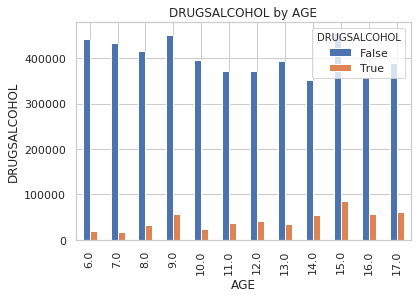

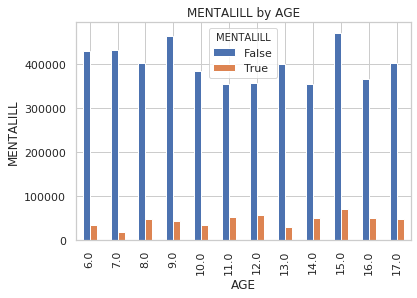

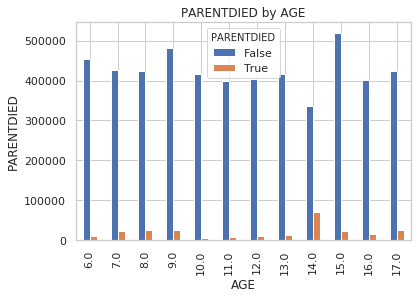

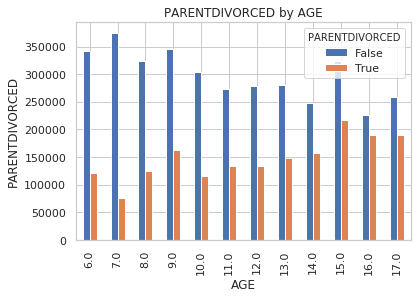

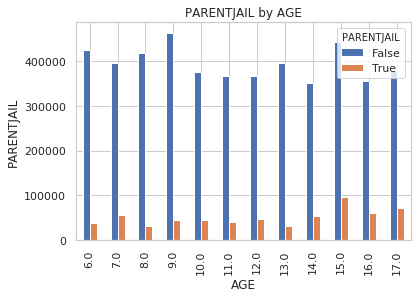

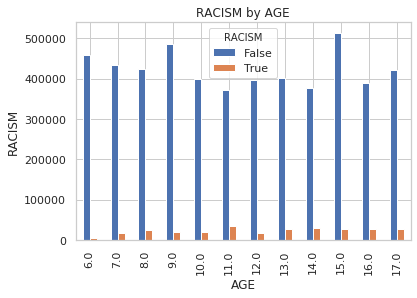

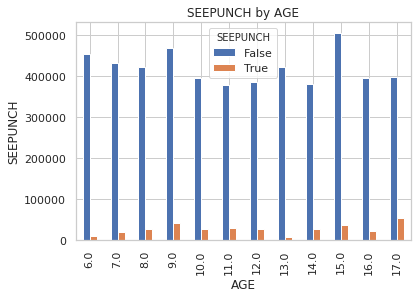

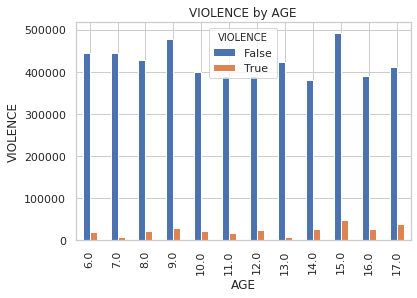

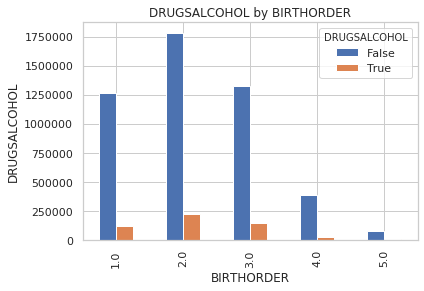

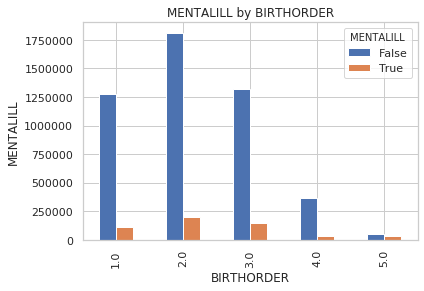

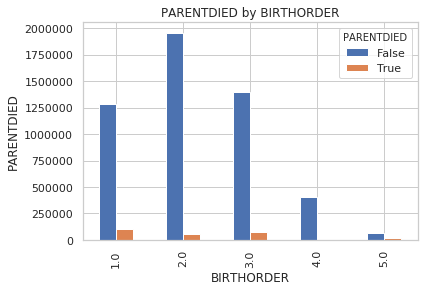

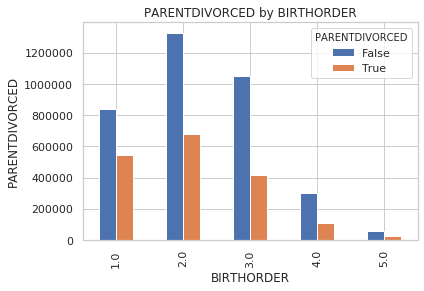

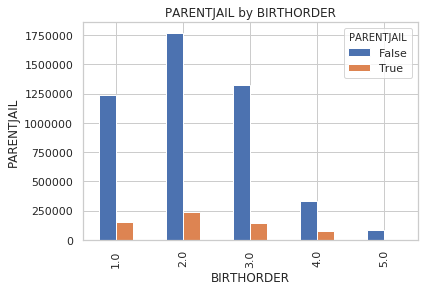

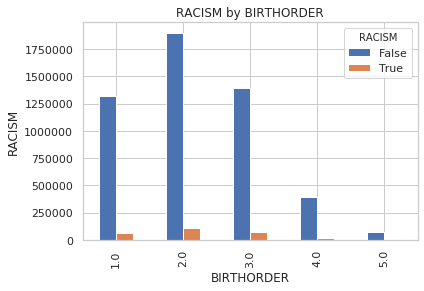

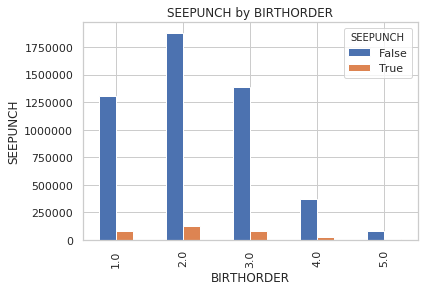

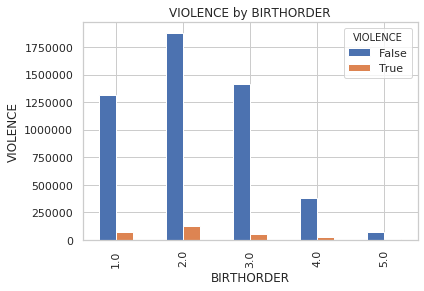

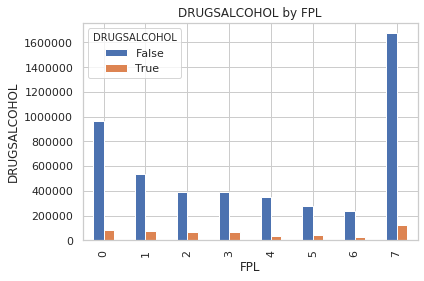

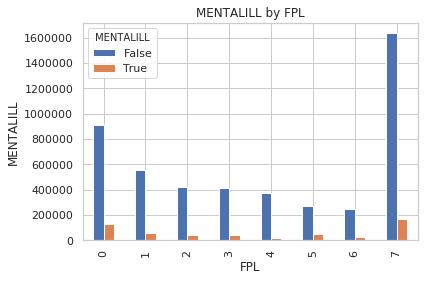

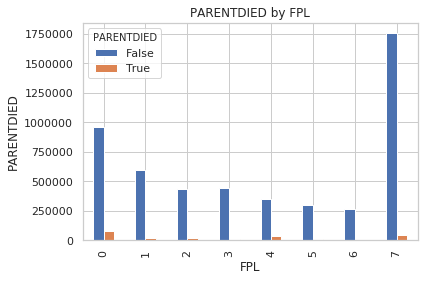

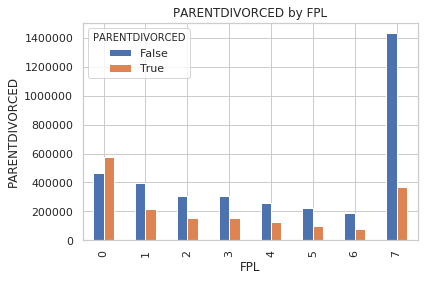

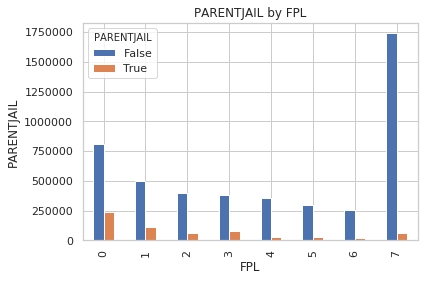

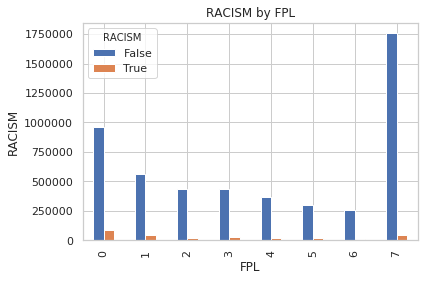

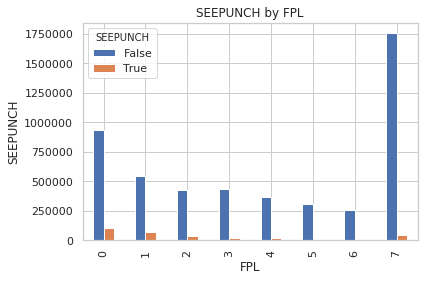

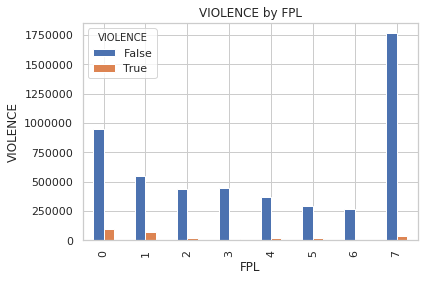

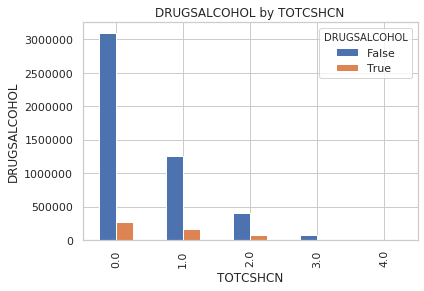

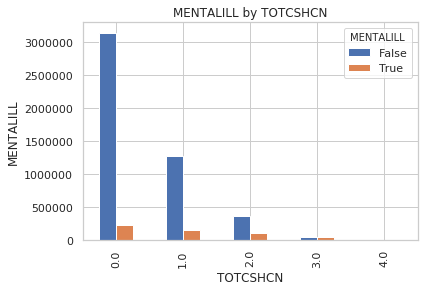

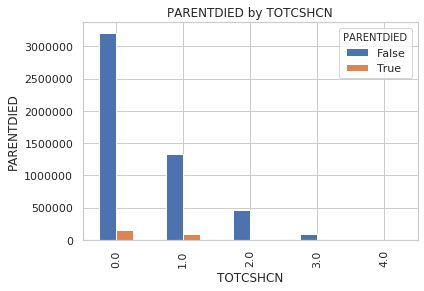

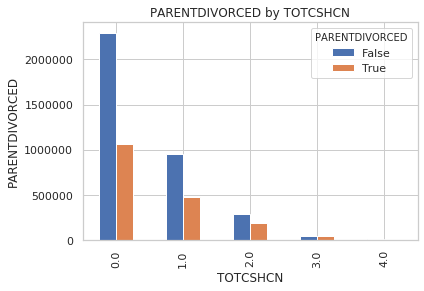

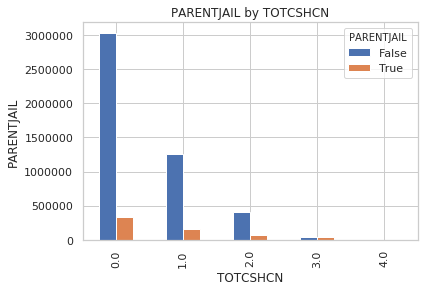

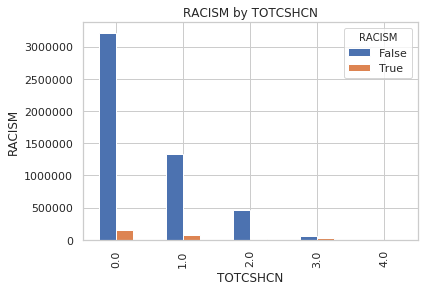

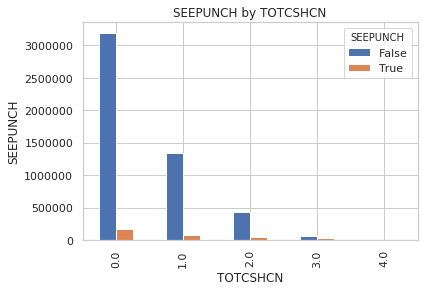

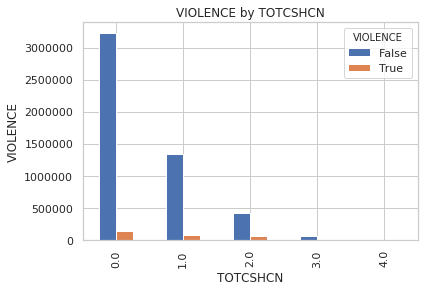

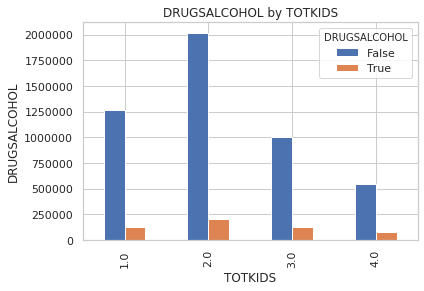

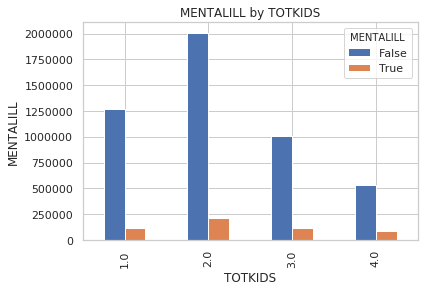

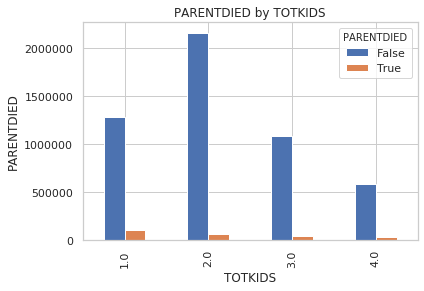

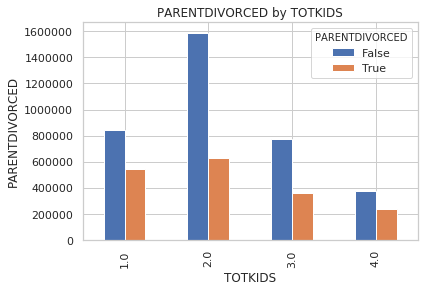

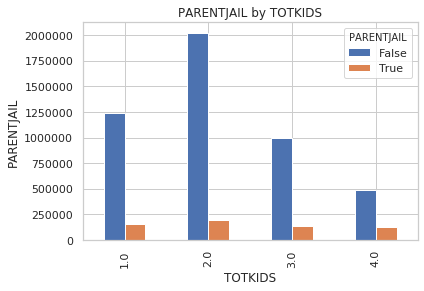

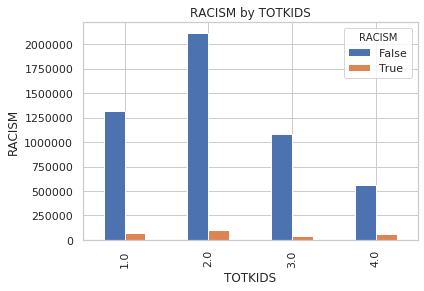

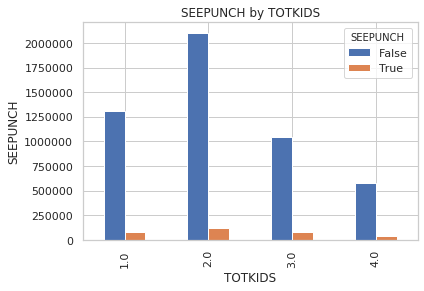

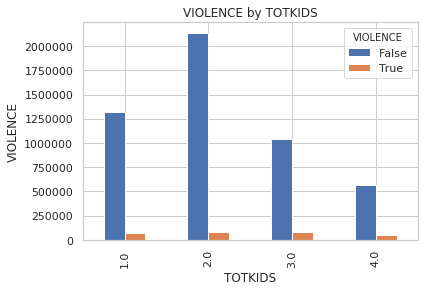

In [20]:
%matplotlib inline
for col in scalarColL:
    for ace in acesL:
        pd.crosstab(massaged_data[col],massaged_data[ace], values=massaged_data.FWC, aggfunc='sum').plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel(ace)
        plt.title('%s by %s' % (ace, col))
        plt.show()

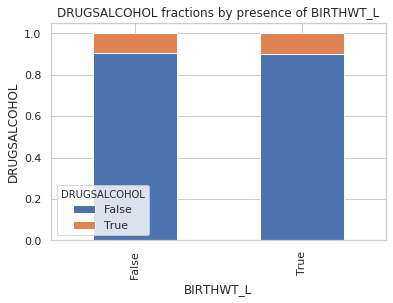

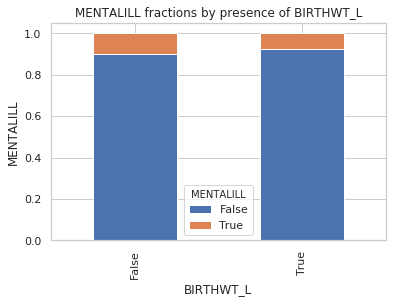

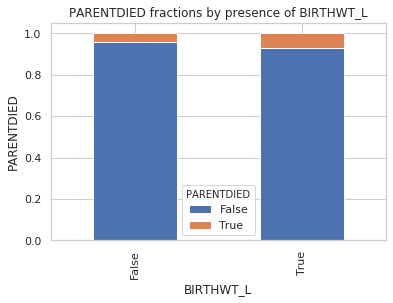

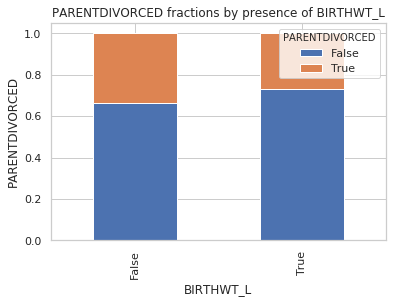

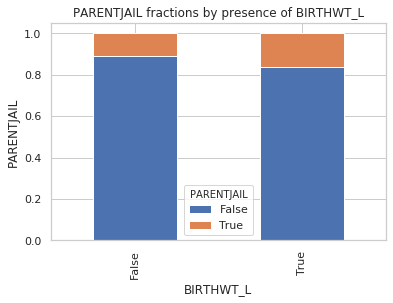

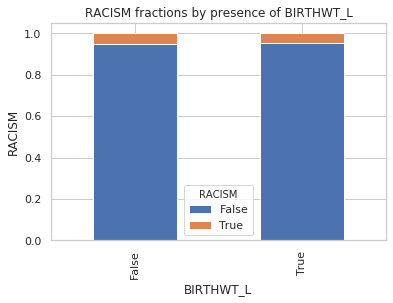

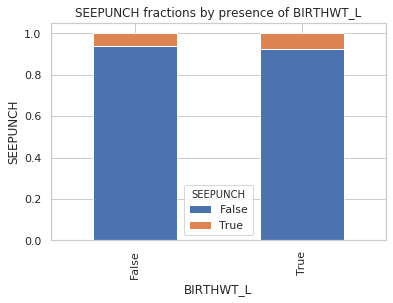

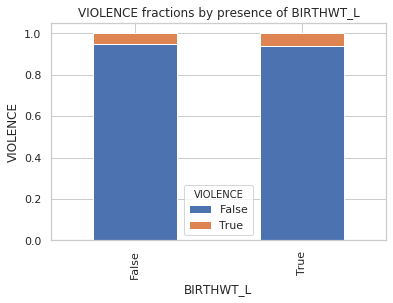

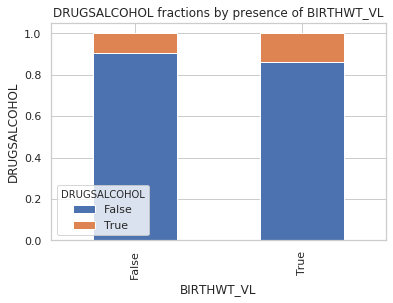

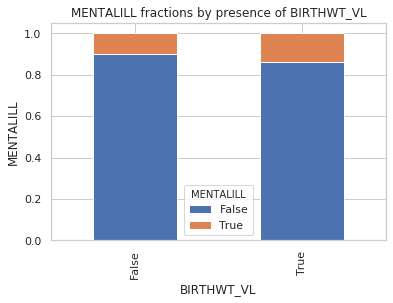

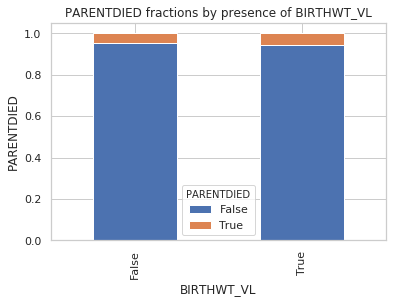

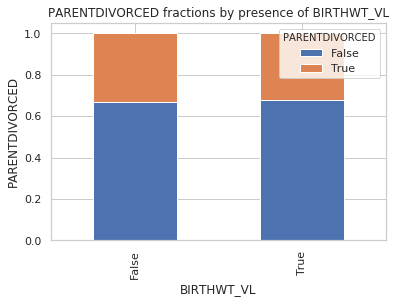

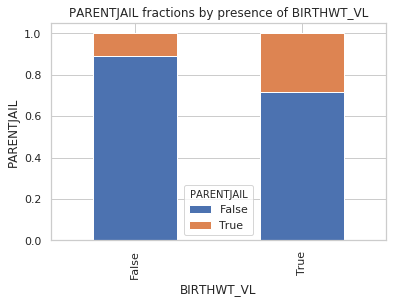

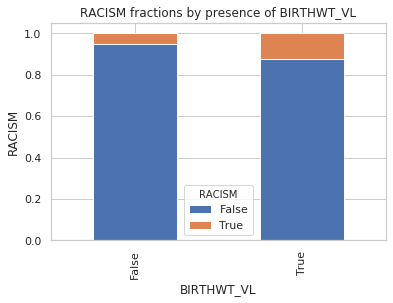

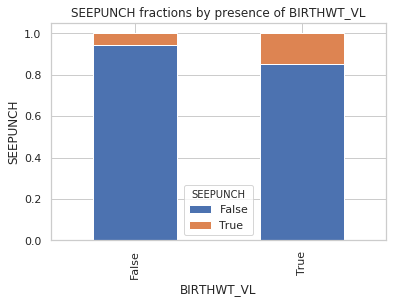

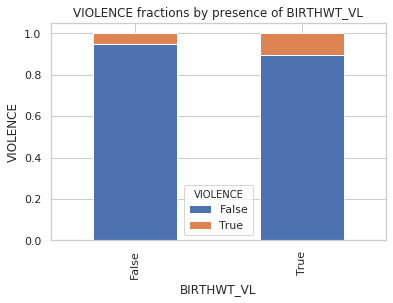

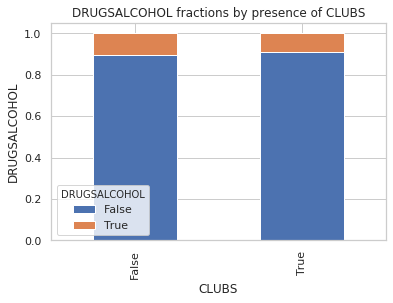

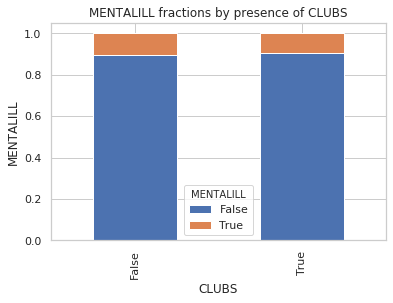

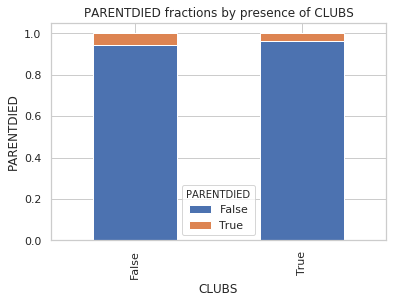

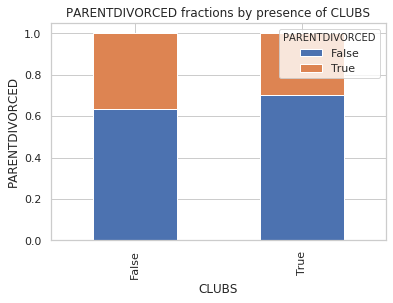

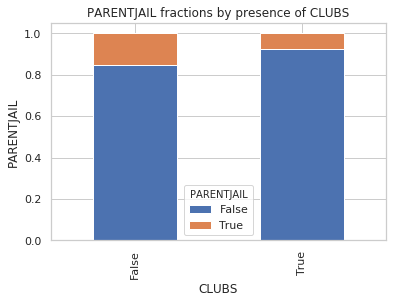

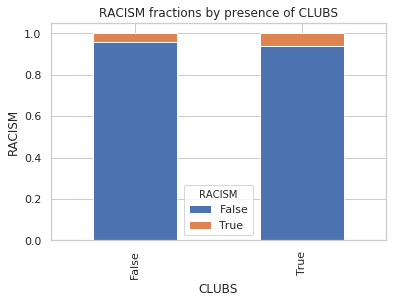

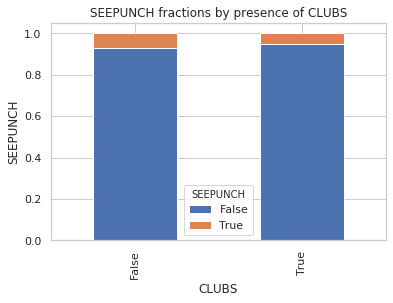

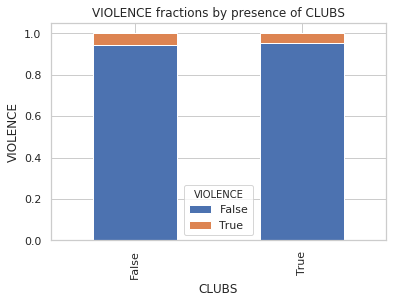

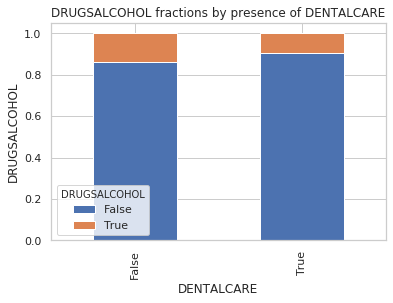

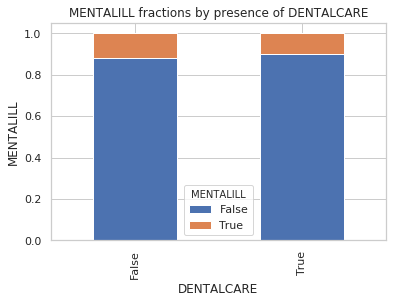

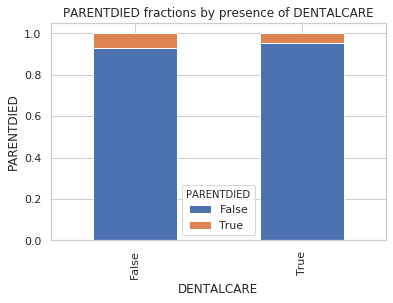

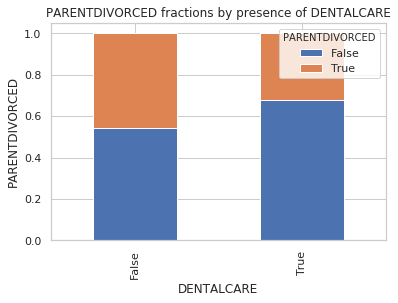

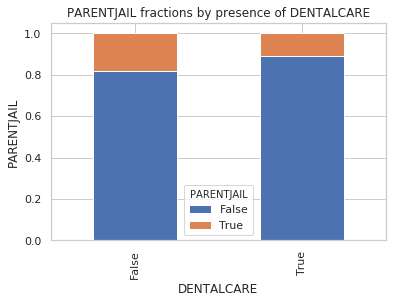

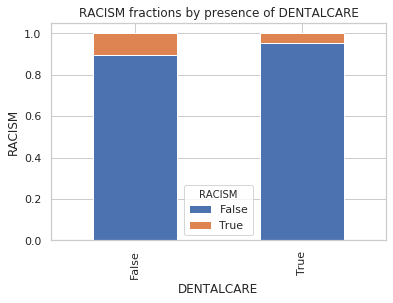

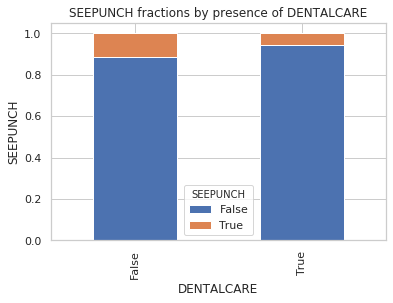

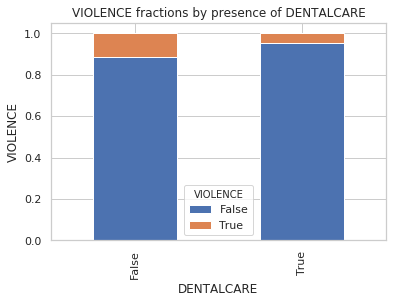

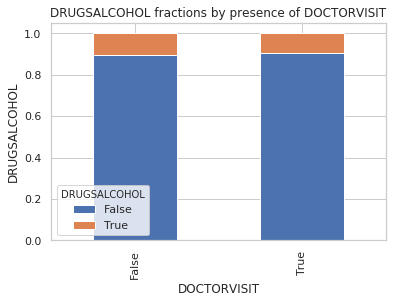

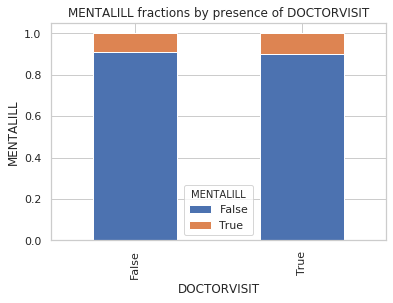

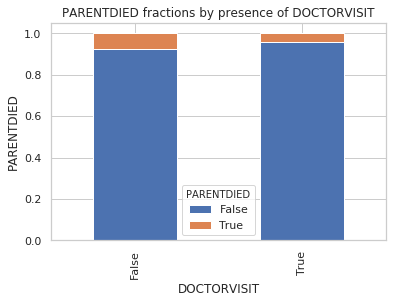

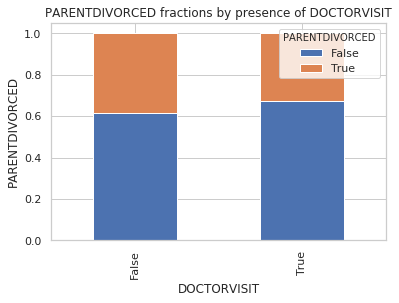

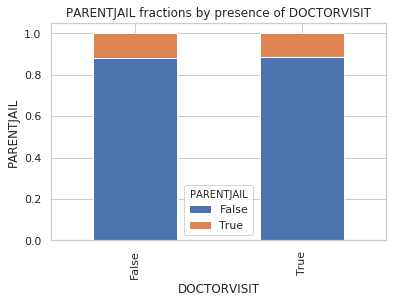

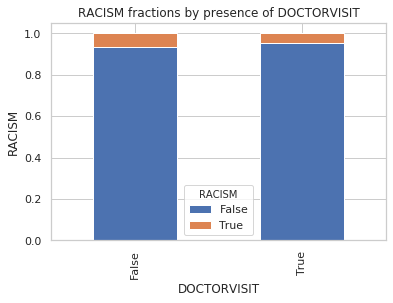

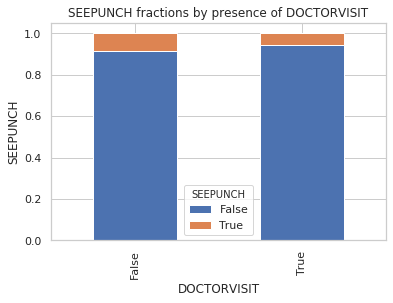

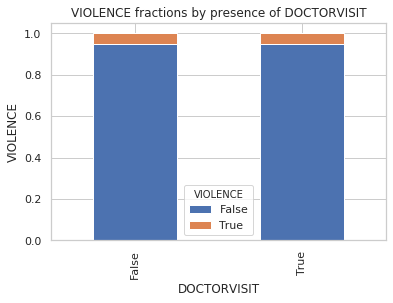

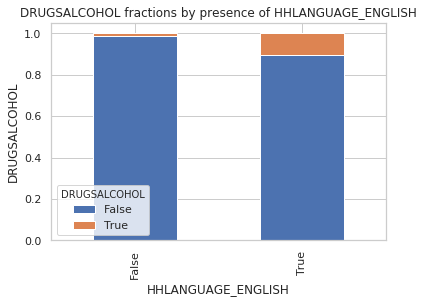

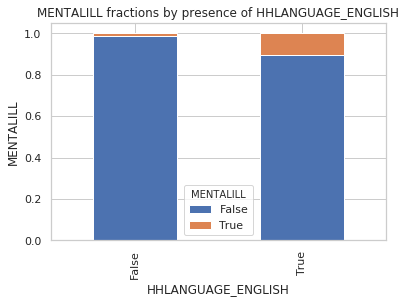

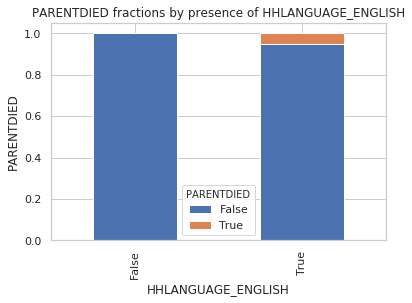

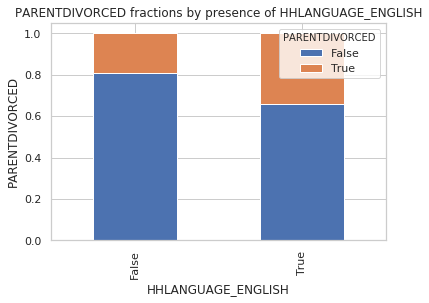

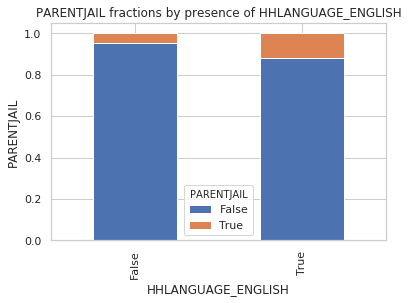

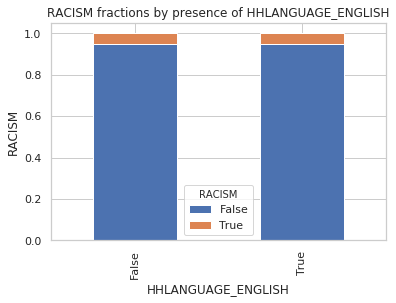

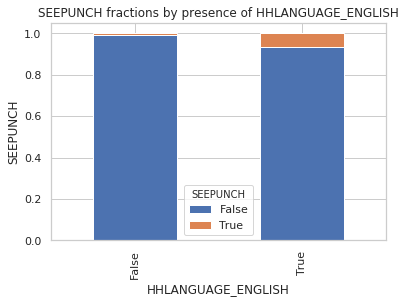

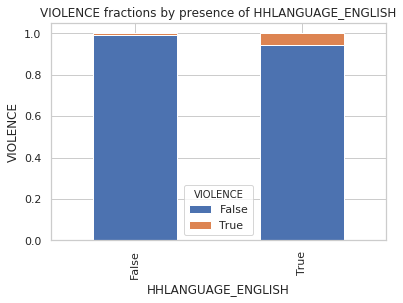

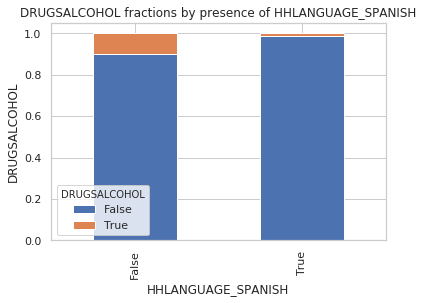

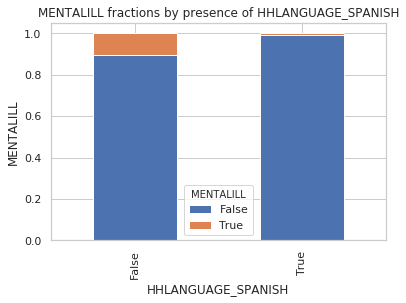

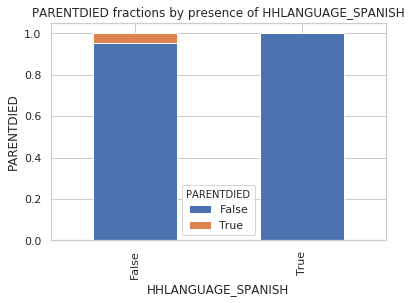

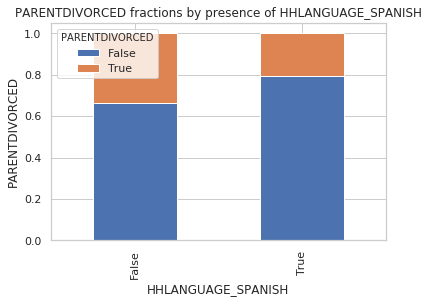

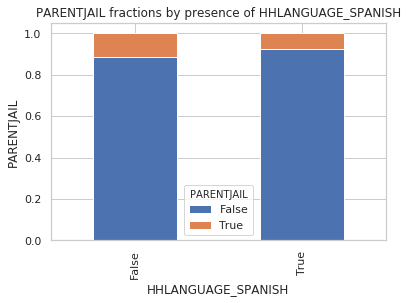

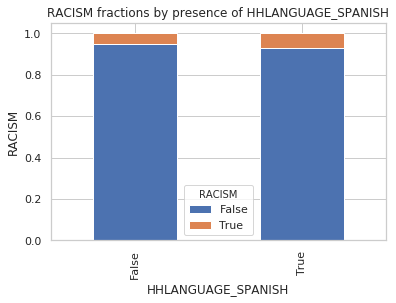

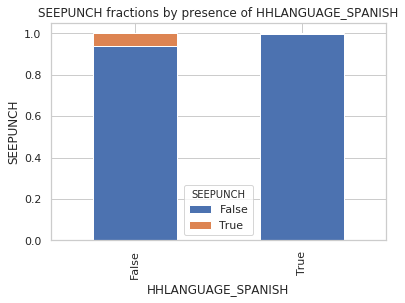

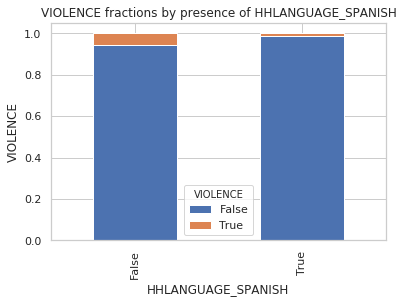

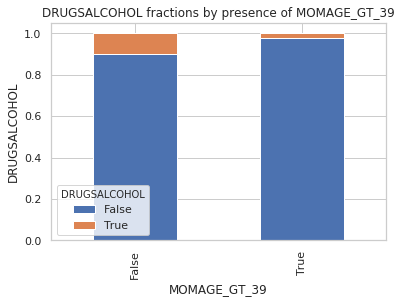

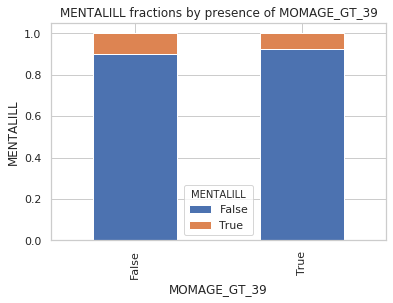

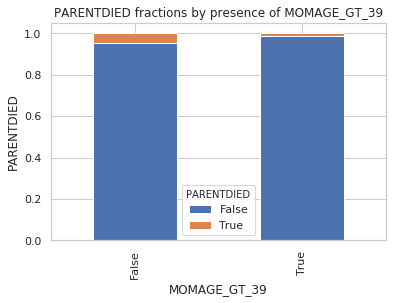

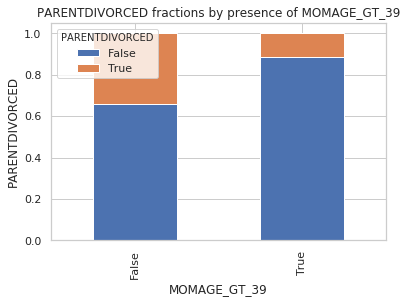

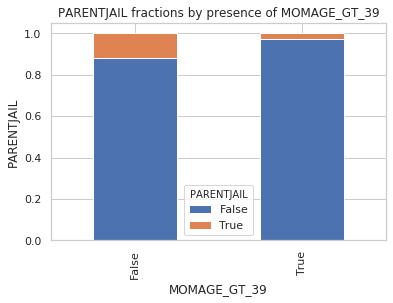

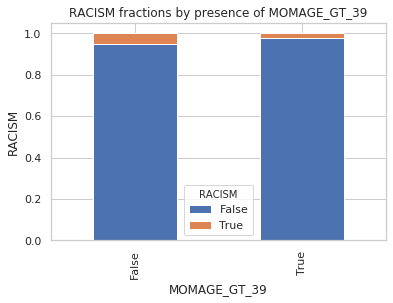

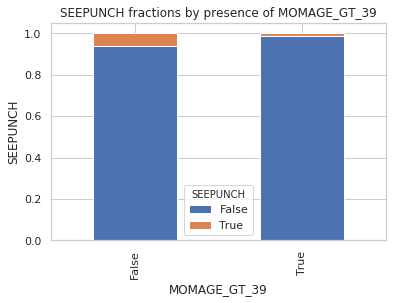

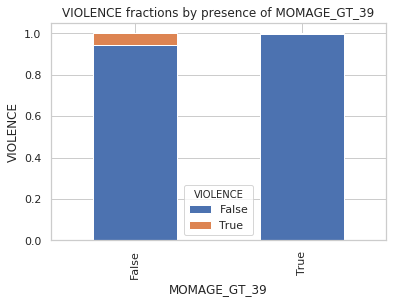

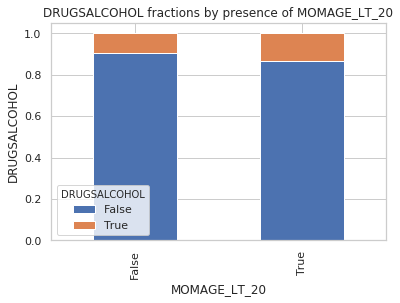

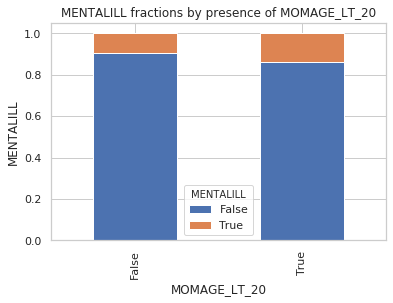

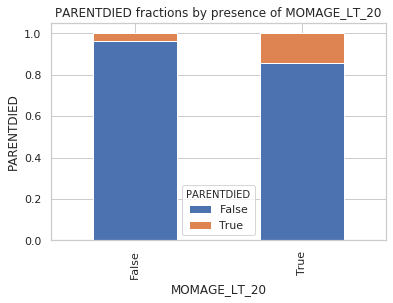

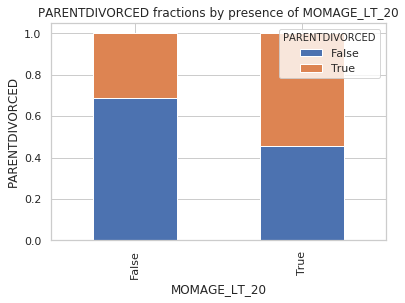

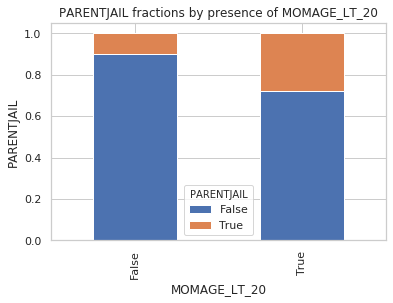

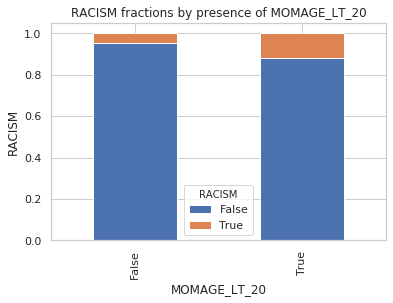

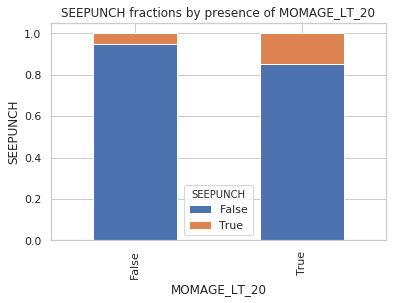

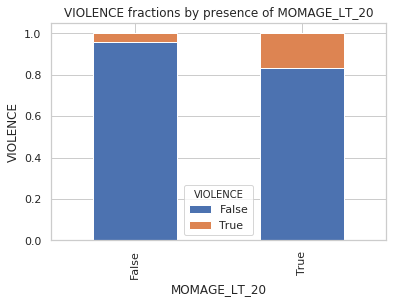

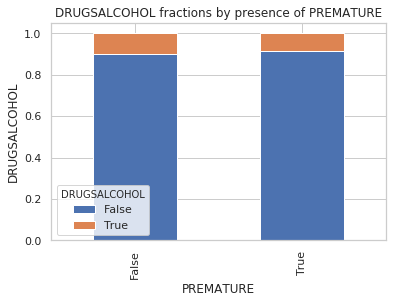

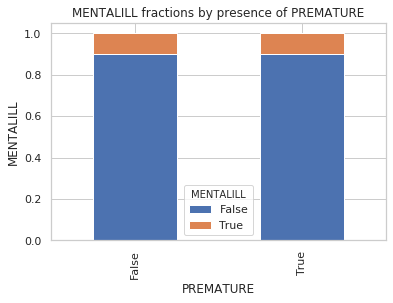

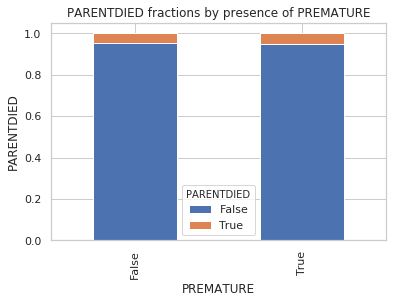

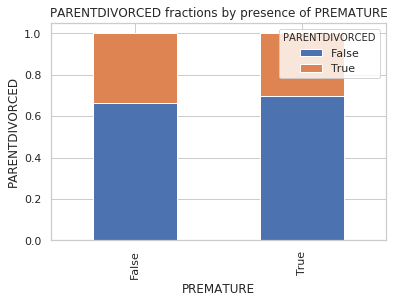

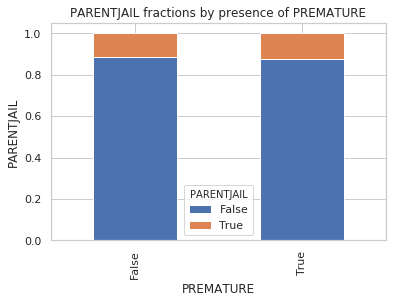

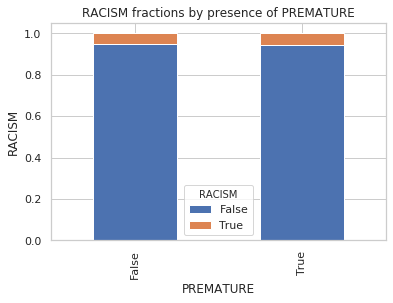

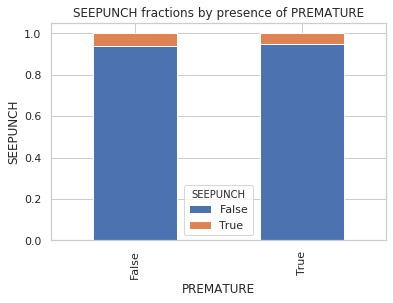

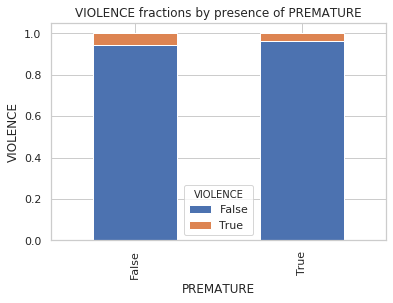

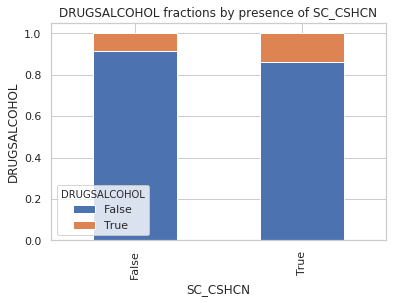

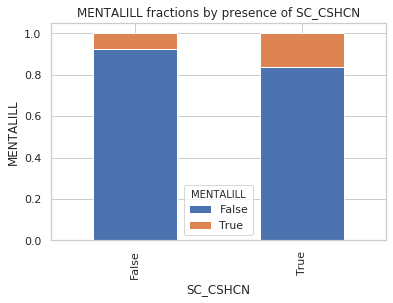

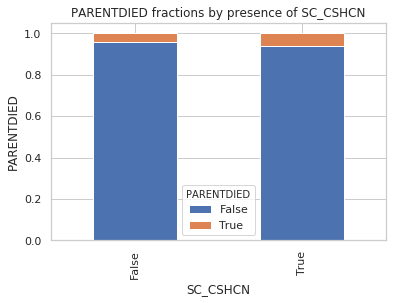

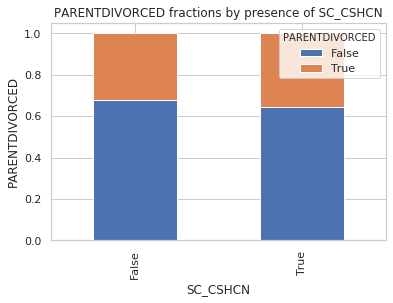

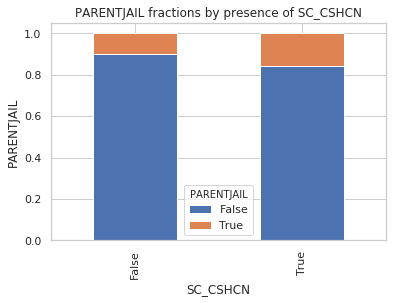

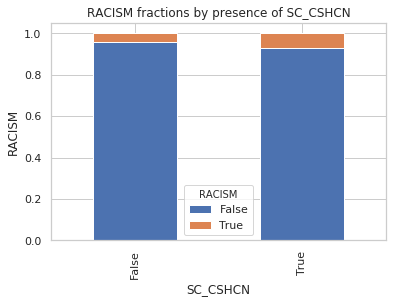

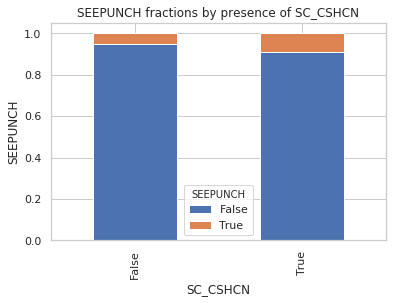

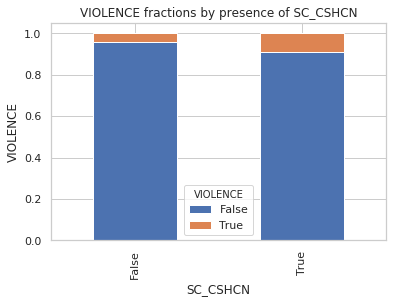

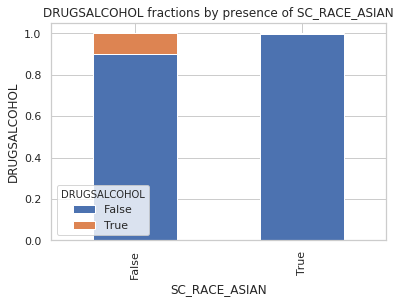

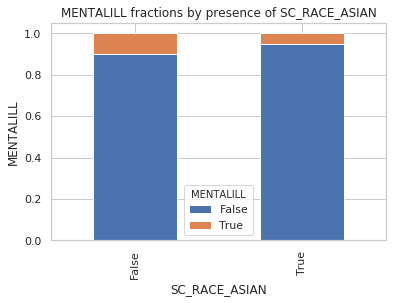

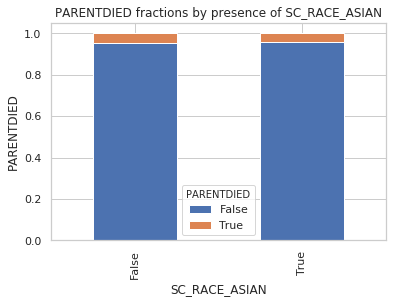

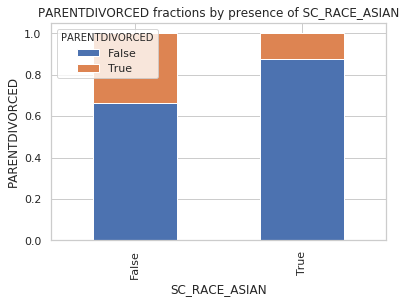

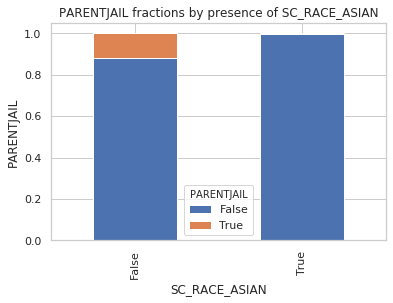

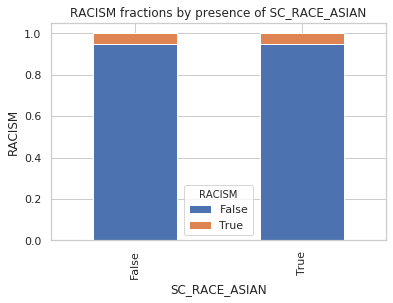

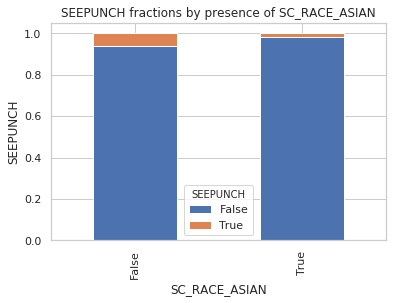

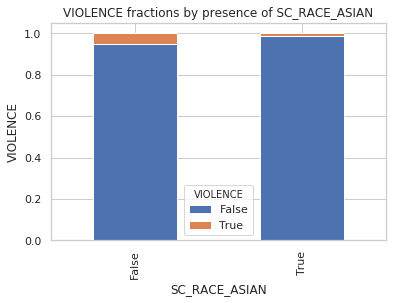

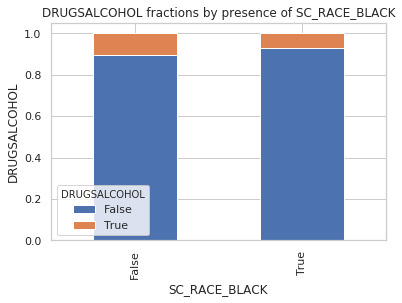

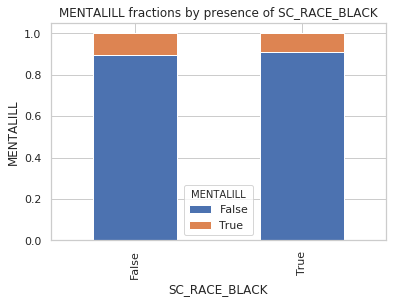

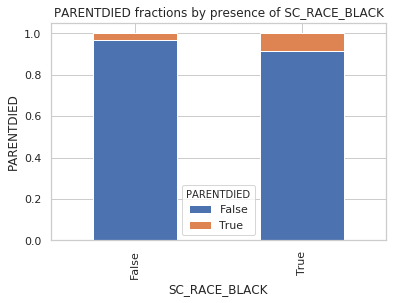

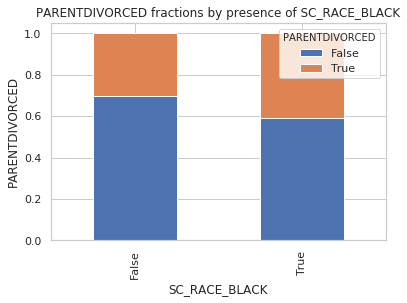

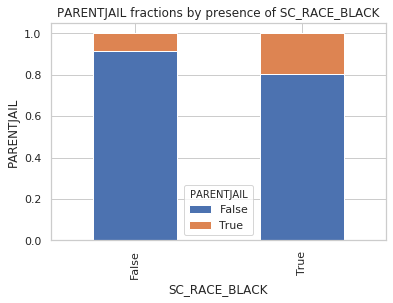

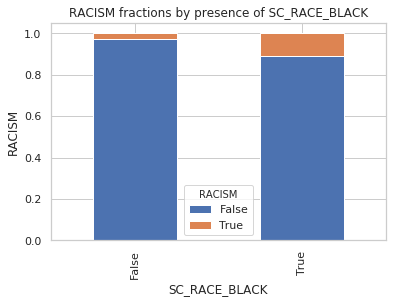

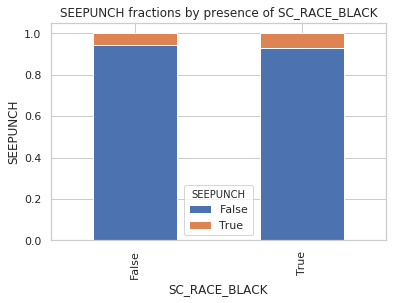

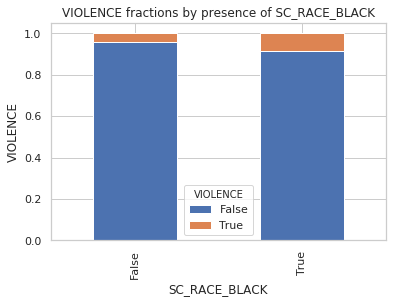

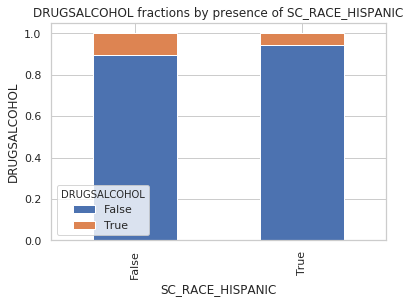

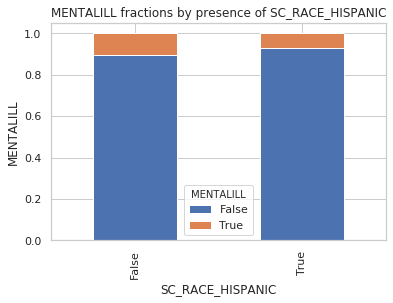

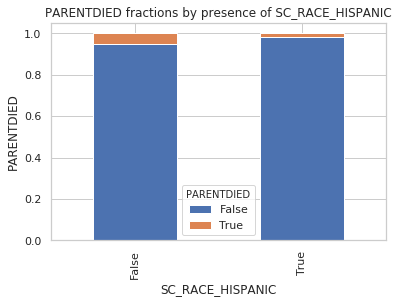

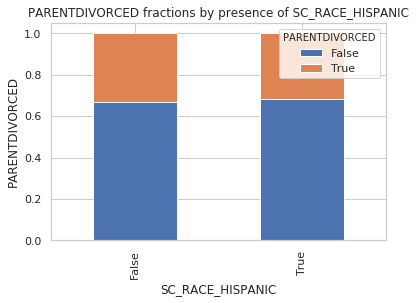

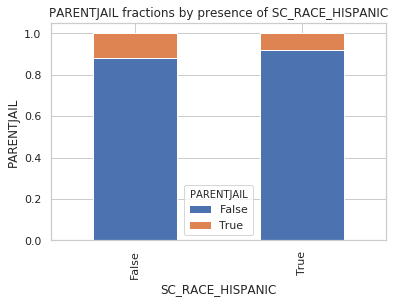

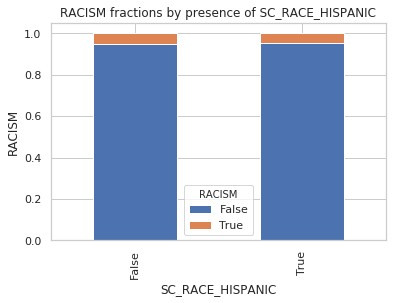

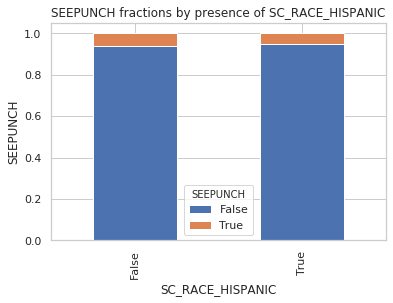

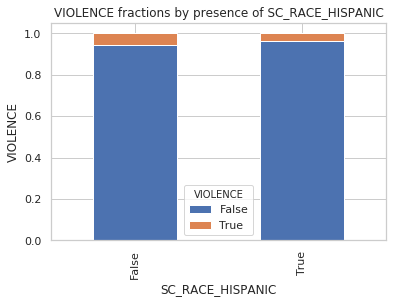

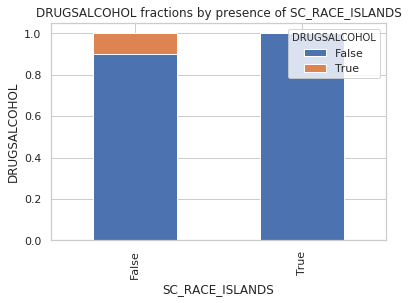

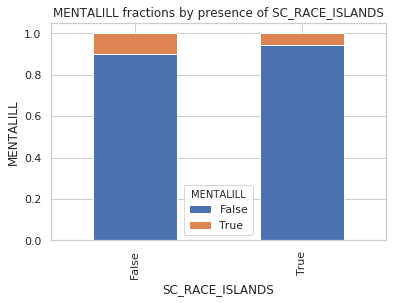

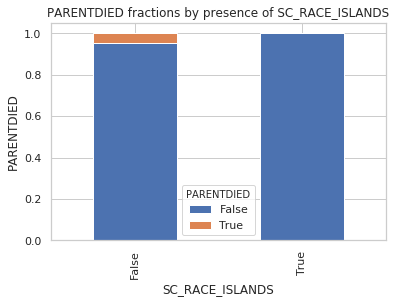

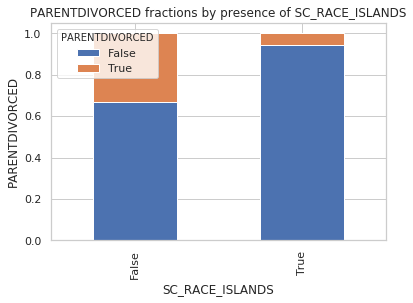

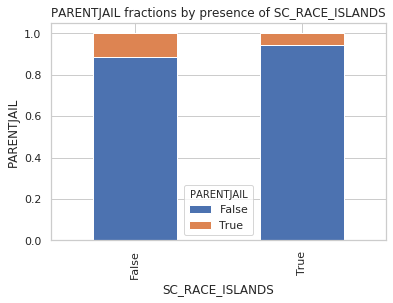

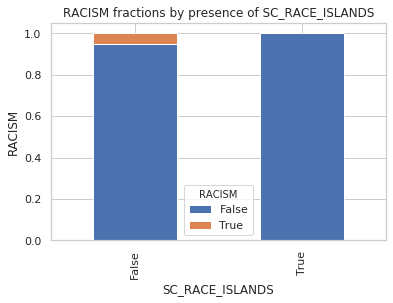

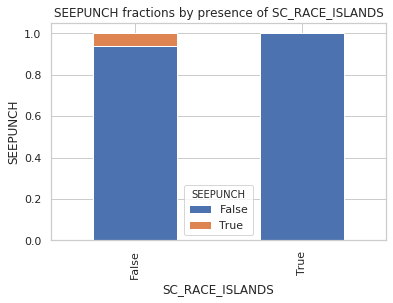

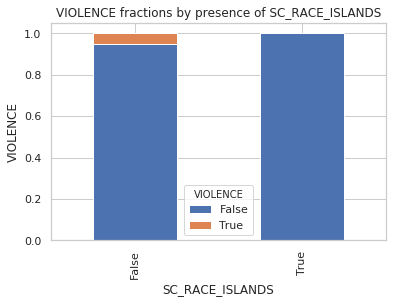

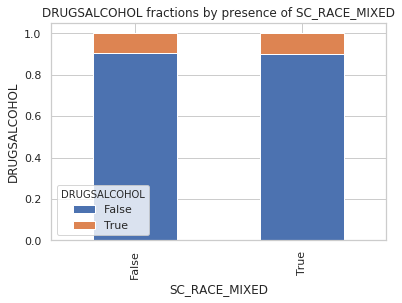

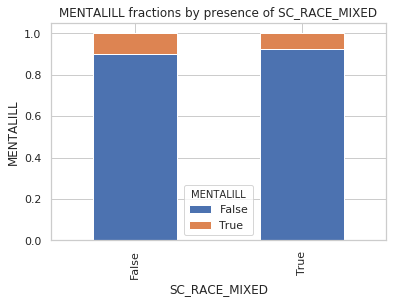

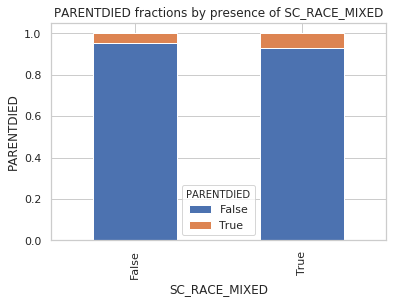

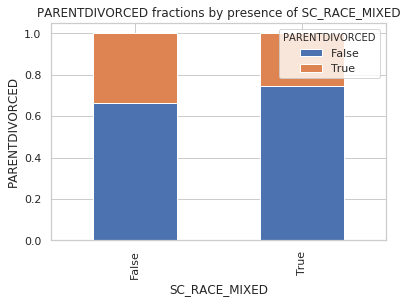

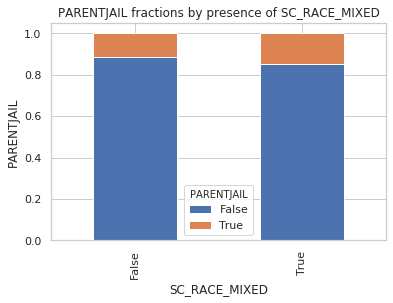

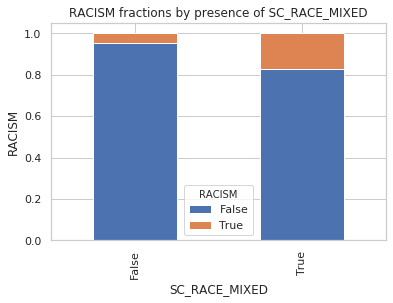

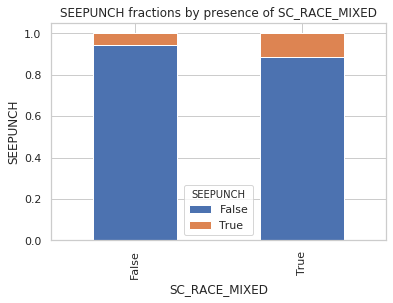

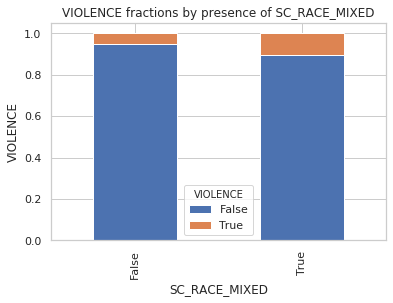

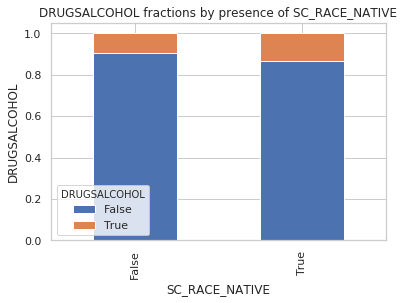

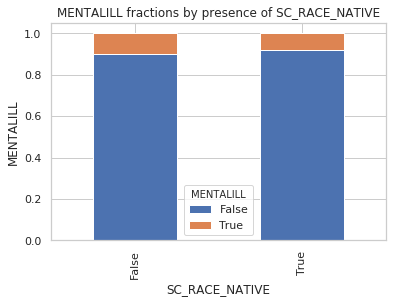

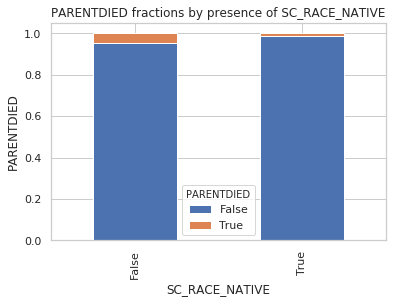

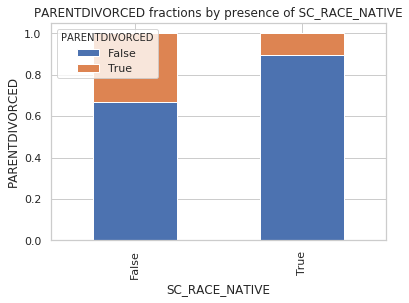

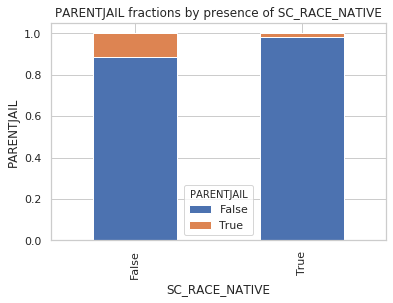

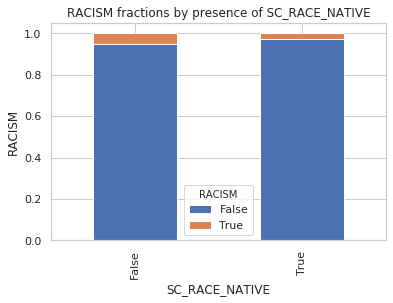

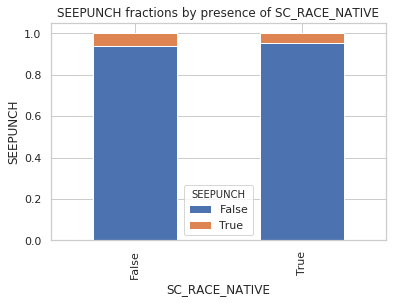

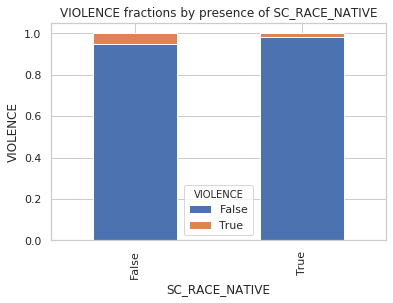

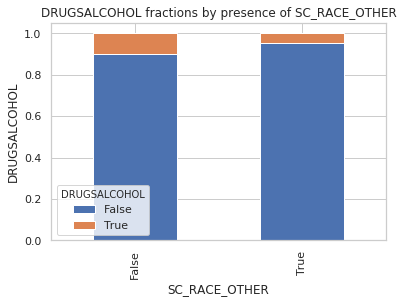

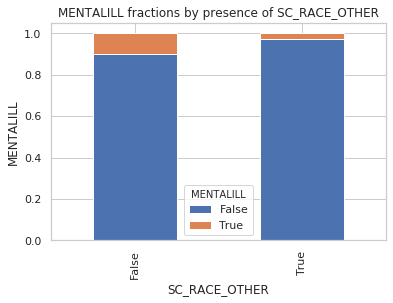

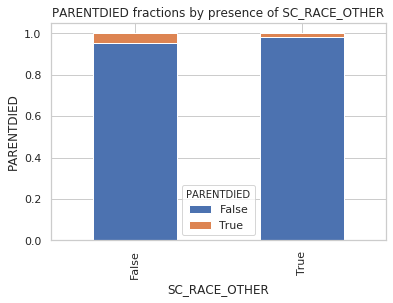

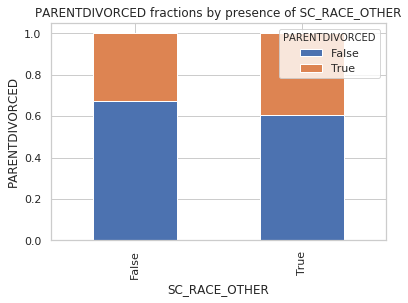

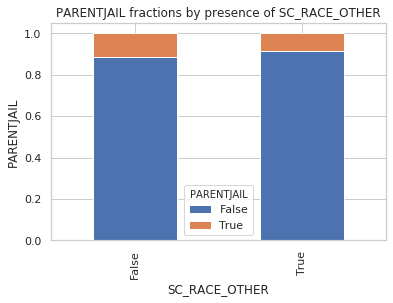

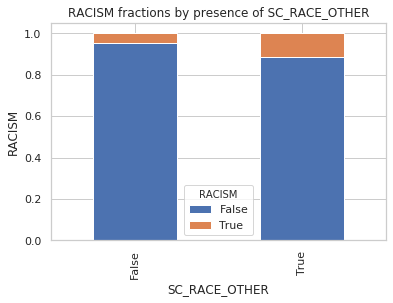

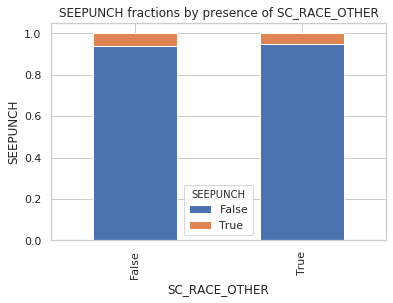

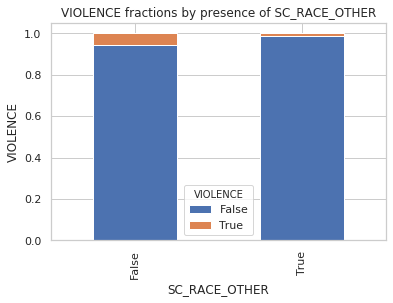

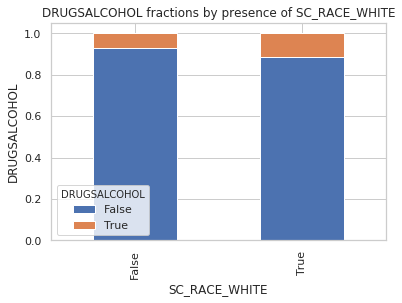

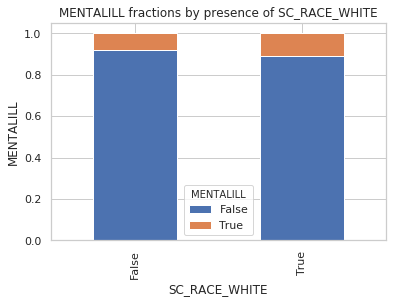

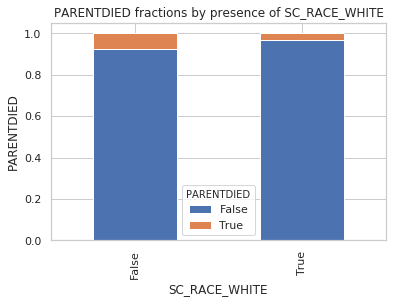

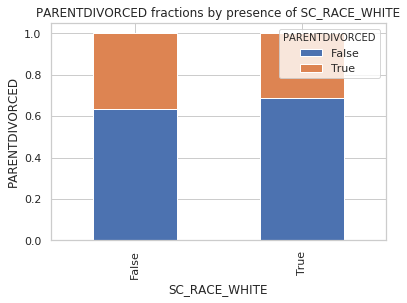

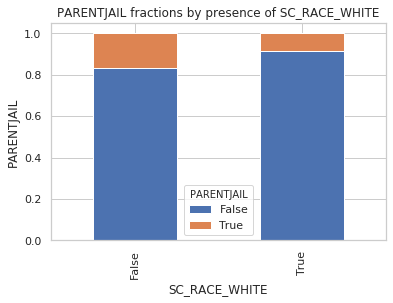

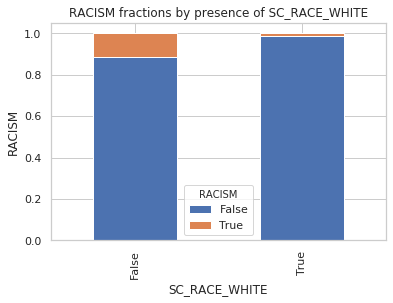

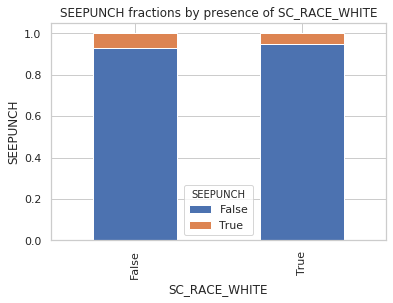

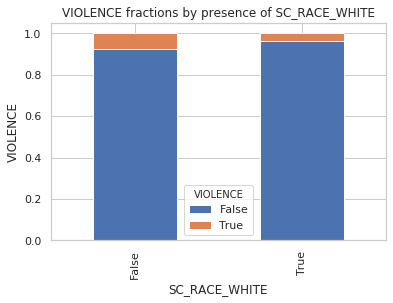

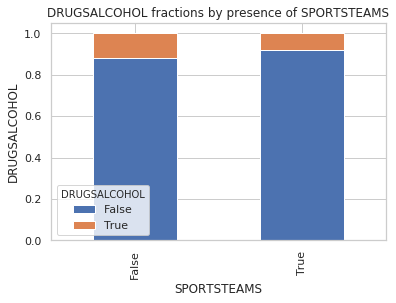

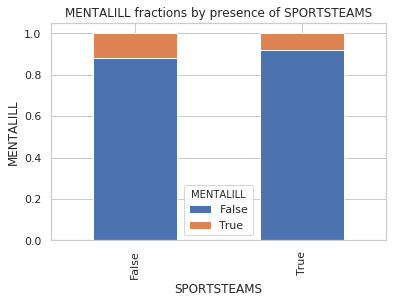

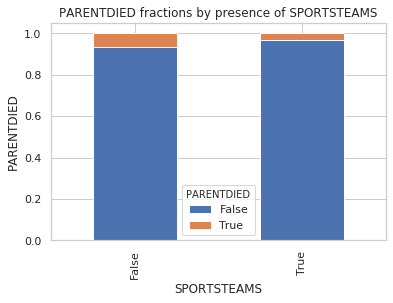

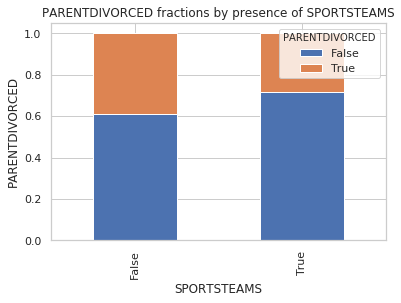

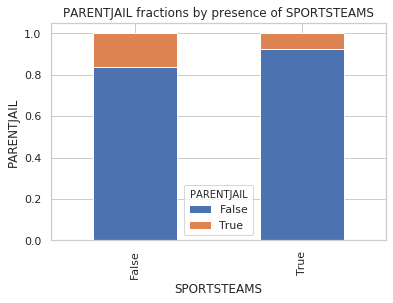

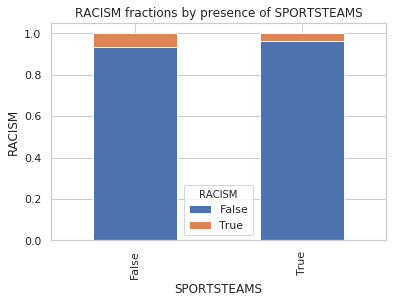

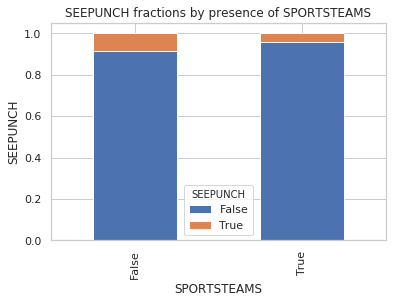

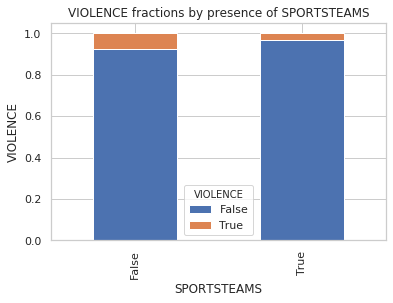

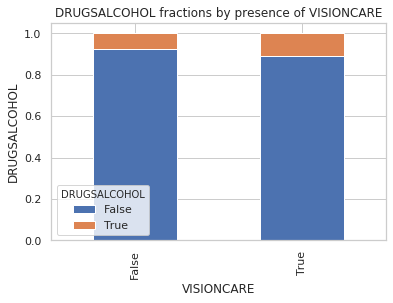

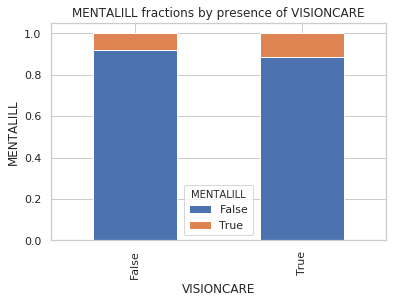

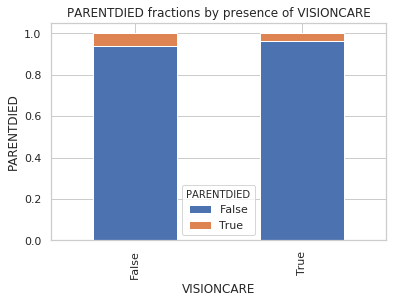

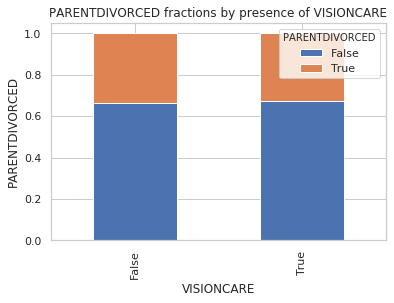

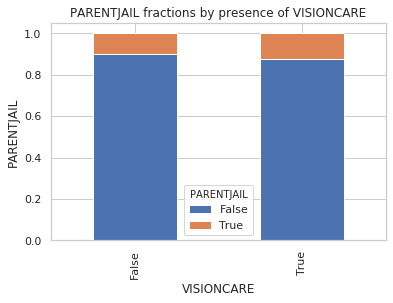

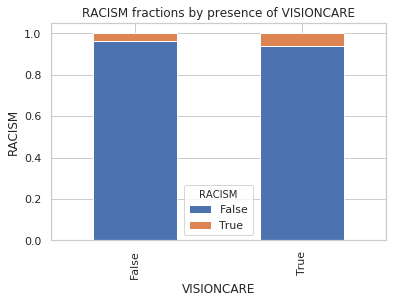

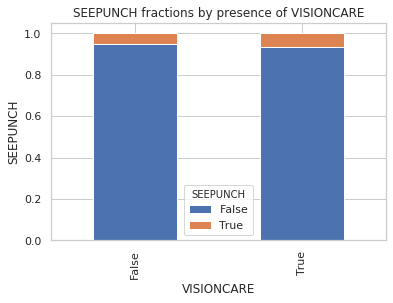

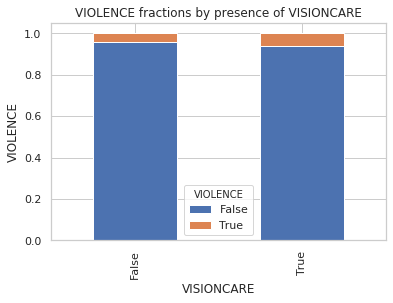

In [21]:
for col in boolColL:
    for ace in acesL:
        table=pd.crosstab(massaged_data[col],massaged_data[ace], values=massaged_data.FWC, aggfunc='sum')
        table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
        plt.xlabel(col)
        plt.ylabel(ace)
        plt.title('%s fractions by presence of %s' % (ace, col))
        plt.show()

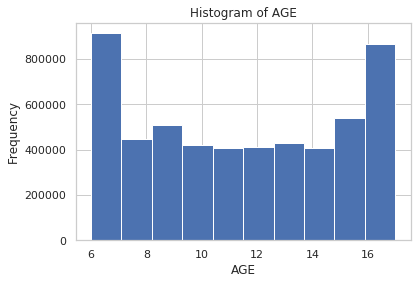

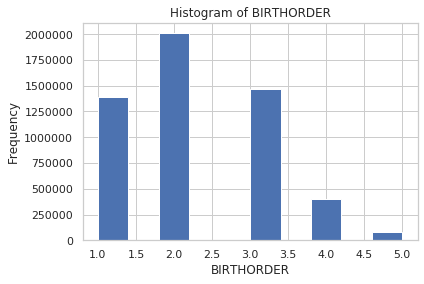

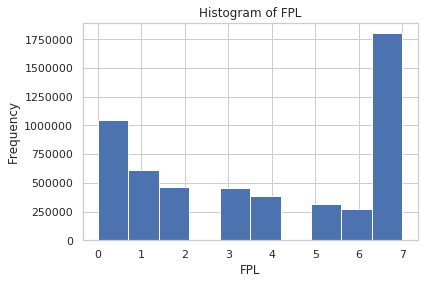

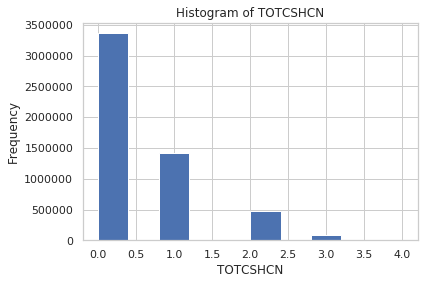

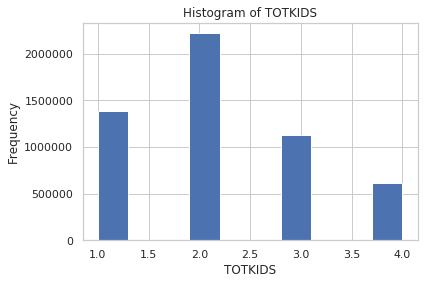

In [22]:
for col in scalarColL:
    massaged_data[col].hist(weights=data.FWC)
    plt.title('Histogram of %s' % col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [23]:
def mkSamps(df, nSamp):
    fracWt = df['FWC']/df['FWC'].sum()
    choices = np.random.choice(len(df), nSamp, p=fracWt)
    return df.iloc[choices].drop(columns=['FWC'])


### Create dummy variables

In [24]:
data = massaged_data.copy()
cat_vars = scalarColL
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

#display(data.head())
    
cat_vars = scalarColL
#print 'cat_vars: ', cat_vars
data_vars = data.columns.values.tolist()
#print 'data_vars: ', data_vars
to_keep=[i for i in data_vars if i not in cat_vars]
#print 'to_keep: ', to_keep
data_final=data[to_keep]
data_final.columns.values

array(['FWC', 'DENTALCARE', 'VISIONCARE', 'SPORTSTEAMS', 'CLUBS',
       'SC_CSHCN', 'BIRTHWT_VL', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH',
       'HHLANGUAGE_SPANISH', 'DOCTORVISIT', 'PREMATURE', 'SC_RACE_WHITE',
       'SC_RACE_BLACK', 'SC_RACE_NATIVE', 'SC_RACE_ASIAN',
       'SC_RACE_ISLANDS', 'SC_RACE_OTHER', 'SC_RACE_MIXED',
       'SC_RACE_HISPANIC', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'DRUGSALCOHOL',
       'MENTALILL', 'PARENTDIED', 'PARENTDIVORCED', 'PARENTJAIL',
       'RACISM', 'SEEPUNCH', 'VIOLENCE', 'AGE_6.0', 'AGE_7.0', 'AGE_8.0',
       'AGE_9.0', 'AGE_10.0', 'AGE_11.0', 'AGE_12.0', 'AGE_13.0',
       'AGE_14.0', 'AGE_15.0', 'AGE_16.0', 'AGE_17.0', 'BIRTHORDER_1.0',
       'BIRTHORDER_2.0', 'BIRTHORDER_3.0', 'BIRTHORDER_4.0',
       'BIRTHORDER_5.0', 'FPL_0', 'FPL_1', 'FPL_2', 'FPL_3', 'FPL_4',
       'FPL_5', 'FPL_6', 'FPL_7', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0',
       'TOTCSHCN_2.0', 'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'TOTKIDS_1.0',
       'TOTKIDS_2.0', 'TOTKIDS_3.0', 'TOTKIDS_4.0'],

### How shall we handle the FPL, which represents a continuous variable? ###

* binned : regress on FPL_0, FPL_1, etc.
* ascending: regress on FPL_AT_LEAST_1, FPL_AT_LEAST_2, etc.
* descending: regress on FPL_LESS_THAN_7, FPL_LESS_THAN_6, etc.

In [25]:
FPL_MODE = 'descending'  # one of 'binned', 'ascending', 'descending'

display(data_final.head())
if FPL_MODE == 'binned':
    assert 'FPL_0' in data_final.columns , 'data_final needs to be regenerated'
elif FPL_MODE == 'ascending':
    data_final1 = data_final.copy()
    data_final1['FPL_AT_LEAST_7'] = data_final['FPL_7']
    data_final1['FPL_AT_LEAST_6'] = data_final1['FPL_AT_LEAST_7'] | data_final['FPL_6']
    data_final1['FPL_AT_LEAST_5'] = data_final1['FPL_AT_LEAST_6'] | data_final['FPL_5']
    data_final1['FPL_AT_LEAST_4'] = data_final1['FPL_AT_LEAST_5'] | data_final['FPL_4']
    data_final1['FPL_AT_LEAST_3'] = data_final1['FPL_AT_LEAST_4'] | data_final['FPL_3']
    data_final1['FPL_AT_LEAST_2'] = data_final1['FPL_AT_LEAST_3'] | data_final['FPL_2']
    data_final1['FPL_AT_LEAST_1'] = data_final1['FPL_AT_LEAST_2'] | data_final['FPL_1']
    drop_these = ['FPL_0', 'FPL_1', 'FPL_2', 'FPL_3', 'FPL_4', 'FPL_5', 'FPL_6', 'FPL_7']
    data_final1 = data_final1.drop(columns=drop_these)
    data_final = data_final1
elif FPL_MODE == 'descending':
    data_final1 = data_final.copy()
    data_final1['FPL_LESS_THAN_1'] = data_final['FPL_0']
    data_final1['FPL_LESS_THAN_2'] = data_final1['FPL_LESS_THAN_1'] | data_final['FPL_1']
    data_final1['FPL_LESS_THAN_3'] = data_final1['FPL_LESS_THAN_2'] | data_final['FPL_2']
    data_final1['FPL_LESS_THAN_4'] = data_final1['FPL_LESS_THAN_3'] | data_final['FPL_3']
    data_final1['FPL_LESS_THAN_5'] = data_final1['FPL_LESS_THAN_4'] | data_final['FPL_4']
    data_final1['FPL_LESS_THAN_6'] = data_final1['FPL_LESS_THAN_5'] | data_final['FPL_5']
    data_final1['FPL_LESS_THAN_7'] = data_final1['FPL_LESS_THAN_6'] | data_final['FPL_6']
    drop_these = ['FPL_0', 'FPL_1', 'FPL_2', 'FPL_3', 'FPL_4', 'FPL_5', 'FPL_6', 'FPL_7']
    data_final1 = data_final1.drop(columns=drop_these)
    data_final = data_final1
else:
    raise RuntimeError('Unknown FPL_mode')
display(data_final.head())
    

,FWC,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,...,FPL_7,TOTCSHCN_0.0,TOTCSHCN_1.0,TOTCSHCN_2.0,TOTCSHCN_3.0,TOTCSHCN_4.0,TOTKIDS_1.0,TOTKIDS_2.0,TOTKIDS_3.0,TOTKIDS_4.0
3,1566.703779,True,True,False,False,False,False,False,True,False,...,1,1,0,0,0,0,0,0,1,0
41,813.451958,True,False,True,True,False,False,False,True,False,...,0,1,0,0,0,0,1,0,0,0
69,1781.495943,True,True,True,True,False,False,False,True,False,...,1,1,0,0,0,0,0,1,0,0
79,1211.975802,True,False,False,True,False,False,False,True,False,...,1,1,0,0,0,0,0,1,0,0
93,2545.444211,False,True,True,False,False,False,False,False,True,...,0,1,0,0,0,0,0,0,1,0


,FWC,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,...,TOTKIDS_2.0,TOTKIDS_3.0,TOTKIDS_4.0,FPL_LESS_THAN_1,FPL_LESS_THAN_2,FPL_LESS_THAN_3,FPL_LESS_THAN_4,FPL_LESS_THAN_5,FPL_LESS_THAN_6,FPL_LESS_THAN_7
3,1566.703779,True,True,False,False,False,False,False,True,False,...,0,1,0,0,0,0,0,0,0,0
41,813.451958,True,False,True,True,False,False,False,True,False,...,0,0,0,0,0,0,1,1,1,1
69,1781.495943,True,True,True,True,False,False,False,True,False,...,1,0,0,0,0,0,0,0,0,0
79,1211.975802,True,False,False,True,False,False,False,True,False,...,1,0,0,0,0,0,0,0,0,0
93,2545.444211,False,True,True,False,False,False,False,False,True,...,0,1,0,0,0,1,1,1,1,1


### Deal with weights by creating a new dataset by weighted sampling ###

In [26]:
data_resampled = mkSamps(data_final, 100000)
data_resampled.head()

,DENTALCARE,VISIONCARE,SPORTSTEAMS,CLUBS,SC_CSHCN,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,DOCTORVISIT,...,TOTKIDS_2.0,TOTKIDS_3.0,TOTKIDS_4.0,FPL_LESS_THAN_1,FPL_LESS_THAN_2,FPL_LESS_THAN_3,FPL_LESS_THAN_4,FPL_LESS_THAN_5,FPL_LESS_THAN_6,FPL_LESS_THAN_7
30432,True,False,False,False,False,True,True,True,False,True,...,0,0,1,0,1,1,1,1,1,1
36979,False,True,True,True,False,False,False,True,False,True,...,0,0,0,0,1,1,1,1,1,1
31873,True,True,True,True,False,False,False,True,False,True,...,0,1,0,0,0,0,0,0,0,0
43343,True,True,True,True,False,False,False,True,False,True,...,0,0,1,1,1,1,1,1,1,1
44297,True,False,False,False,False,False,False,True,False,True,...,0,0,1,1,1,1,1,1,1,1


### Over-sampling using SMOTE

In [27]:
print([(col in acesL) for col in data_resampled.columns])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [28]:
X = data_resampled.loc[:, [(col not in acesL) for col in data_resampled.columns]]
X.head()
y = {}
for ace in acesL:
    y[ace] = data_resampled.loc[:, [(col == ace) for col in data_resampled.columns]]
    y[ace].name = ace
for ace, yy in y.items():
    print('y[%s]: ' % ace)
    display(y[ace].head())

y[DRUGSALCOHOL]: 


,DRUGSALCOHOL
30432,False
36979,False
31873,False
43343,False
44297,False


y[MENTALILL]: 


,MENTALILL
30432,False
36979,False
31873,False
43343,True
44297,False


y[PARENTDIED]: 


,PARENTDIED
30432,False
36979,False
31873,False
43343,False
44297,False


y[PARENTDIVORCED]: 


,PARENTDIVORCED
30432,False
36979,False
31873,True
43343,True
44297,True


y[PARENTJAIL]: 


,PARENTJAIL
30432,False
36979,False
31873,False
43343,False
44297,True


y[RACISM]: 


,RACISM
30432,False
36979,False
31873,False
43343,False
44297,False


y[SEEPUNCH]: 


,SEEPUNCH
30432,False
36979,False
31873,False
43343,False
44297,False


y[VIOLENCE]: 


,VIOLENCE
30432,False
36979,False
31873,False
43343,False
44297,False


In [29]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train = {}
X_test = {}
y_train = {}
y_test = {}
os_data_X = {}
os_data_y = {}

for ace in acesL:
    X_train[ace], X_test[ace], y_train[ace], y_test[ace] = train_test_split(X, y[ace], test_size=0.3, random_state=0)
    columns = X_train[ace].columns

    os_data_X[ace],os_data_y[ace]=os.fit_sample(X_train[ace].values, y_train[ace].values.ravel())
    os_data_X[ace] = pd.DataFrame(data=os_data_X[ace],columns=columns )
    os_data_y[ace]= pd.DataFrame(data=os_data_y[ace],columns=[ace])

    # we can Check the numbers of our data
    print("--------")
    print("Sampling for %s" % ace)
    print("length of oversampled data is ",len(os_data_X[ace]))
    print("Number of no subscription in oversampled data",len(os_data_y[ace][os_data_y[ace][ace]==0]))
    print("Number of subscription",len(os_data_y[ace][os_data_y[ace][ace]==1]))
    print("Proportion of no subscription data in oversampled data is ",(float(len(os_data_y[ace][os_data_y[ace][ace]==0]))
                                                                        /float(len(os_data_X[ace]))))
    print("Proportion of subscription data in oversampled data is ",(float(len(os_data_y[ace][os_data_y[ace][ace]==1]))
                                                                        /float(len(os_data_X[ace]))))

--------
Sampling for DRUGSALCOHOL
length of oversampled data is  126374
Number of no subscription in oversampled data 63187
Number of subscription 63187
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5
--------
Sampling for MENTALILL
length of oversampled data is  126034
Number of no subscription in oversampled data 63017
Number of subscription 63017
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5
--------
Sampling for PARENTDIED
length of oversampled data is  133684
Number of no subscription in oversampled data 66842
Number of subscription 66842
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5
--------
Sampling for PARENTDIVORCED
length of oversampled data is  93930
Number of no subscription in oversampled data 46965
Number of subscription 46965
Proportion of no su

### Recursive feature elimination

In [30]:
data_resampled_vars=data_resampled.columns.values.tolist()
X=[i for i in data_resampled_vars if i not in acesL]

In [31]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = {}
cols_after_rfe = {}
for ace in acesL:
    logreg = LogisticRegression()


    rfe[ace] = RFE(logreg, 20)
    rfe[ace].set_params(estimator__max_iter=1000)
    rfe[ace] = rfe[ace].fit(os_data_X[ace], os_data_y[ace].values.ravel())
    print('---------')
    print('Regressing for %s' % ace)
    print('---------')
    print(rfe[ace].support_)
    print(rfe[ace].ranking_)
    cols_after_rfe[ace] = os_data_X[ace].columns[rfe[ace].support_]
    print('selected columns: ', cols_after_rfe[ace])
    display(os_data_X[ace][cols_after_rfe[ace]].head())

---------
Regressing for DRUGSALCOHOL
---------
[False False False False False False False  True False False False  True
 False  True  True  True  True  True  True False  True  True  True False
 False  True False False False False  True False False False False False
  True False  True  True False False  True False False False False  True
 False False  True False False  True]
[ 6 18 21 14 10  2 30  1 13 16  7  1 35  1  1  1  1  1  1 15  1  1  1 19
 12  1 34 29 20  4  1  3  5 27 25 24  1  8  1  1 11 26  1 31 28  9 32  1
 23 22  1 33 17  1]
selected columns:  Index(['HHLANGUAGE_ENGLISH', 'SC_RACE_WHITE', 'SC_RACE_NATIVE',
       'SC_RACE_ASIAN', 'SC_RACE_ISLANDS', 'SC_RACE_OTHER', 'SC_RACE_MIXED',
       'SC_RACE_HISPANIC', 'MOMAGE_GT_39', 'AGE_6.0', 'AGE_7.0', 'AGE_10.0',
       'AGE_15.0', 'BIRTHORDER_4.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0',
       'TOTCSHCN_4.0', 'FPL_LESS_THAN_1', 'FPL_LESS_THAN_4',
       'FPL_LESS_THAN_7'],
      dtype='object')


,HHLANGUAGE_ENGLISH,SC_RACE_WHITE,SC_RACE_NATIVE,SC_RACE_ASIAN,SC_RACE_ISLANDS,SC_RACE_OTHER,SC_RACE_MIXED,SC_RACE_HISPANIC,MOMAGE_GT_39,AGE_6.0,AGE_7.0,AGE_10.0,AGE_15.0,BIRTHORDER_4.0,TOTCSHCN_0.0,TOTCSHCN_1.0,TOTCSHCN_4.0,FPL_LESS_THAN_1,FPL_LESS_THAN_4,FPL_LESS_THAN_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


---------
Regressing for MENTALILL
---------
[False False False False False  True  True  True False False False  True
 False False False False False False False False False False  True False
 False False False  True False False  True  True False False  True  True
  True  True  True  True False  True  True  True False False False False
 False False  True  True  True False]
[15 19  5 20 31  1  1  1 13 28 34  1 16 26 18 25 35 17 14  8 27  9  1  4
 24 33  3  1 23  2  1  1 32  7  1  1  1  1  1  1 11  1  1  1 29 30  6 12
 22 21  1  1  1 10]
selected columns:  Index(['BIRTHWT_VL', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'SC_RACE_WHITE',
       'AGE_7.0', 'AGE_12.0', 'AGE_15.0', 'AGE_16.0', 'BIRTHORDER_2.0',
       'BIRTHORDER_3.0', 'BIRTHORDER_4.0', 'BIRTHORDER_5.0', 'TOTCSHCN_0.0',
       'TOTCSHCN_1.0', 'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'TOTKIDS_1.0',
       'FPL_LESS_THAN_4', 'FPL_LESS_THAN_5', 'FPL_LESS_THAN_6'],
      dtype='object')


,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,SC_RACE_WHITE,AGE_7.0,AGE_12.0,AGE_15.0,AGE_16.0,BIRTHORDER_2.0,BIRTHORDER_3.0,BIRTHORDER_4.0,BIRTHORDER_5.0,TOTCSHCN_0.0,TOTCSHCN_1.0,TOTCSHCN_3.0,TOTCSHCN_4.0,TOTKIDS_1.0,FPL_LESS_THAN_4,FPL_LESS_THAN_5,FPL_LESS_THAN_6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


---------
Regressing for PARENTDIED
---------
[False False False False  True False  True  True  True False False False
 False  True  True  True False False False  True  True False False False
 False  True False False  True  True False False False False  True False
  True  True  True  True False  True  True False False False False False
 False False False False  True False]
[24 17 11 34  1 14  1  1  1  3 13 30 15  1  1  1 10 16 27  1  1  2 32 12
 33  1  6 23  1  1 19  7 20 29  1 21  1  1  1  1 35  1  1 31 26 28  4 22
 25  9  8 18  1  5]
selected columns:  Index(['SC_CSHCN', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'HHLANGUAGE_SPANISH',
       'SC_RACE_NATIVE', 'SC_RACE_ASIAN', 'SC_RACE_ISLANDS', 'MOMAGE_LT_20',
       'MOMAGE_GT_39', 'AGE_10.0', 'AGE_13.0', 'AGE_14.0', 'BIRTHORDER_2.0',
       'BIRTHORDER_4.0', 'BIRTHORDER_5.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0',
       'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'FPL_LESS_THAN_6'],
      dtype='object')


,SC_CSHCN,BIRTHWT_L,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,SC_RACE_NATIVE,SC_RACE_ASIAN,SC_RACE_ISLANDS,MOMAGE_LT_20,MOMAGE_GT_39,AGE_10.0,AGE_13.0,AGE_14.0,BIRTHORDER_2.0,BIRTHORDER_4.0,BIRTHORDER_5.0,TOTCSHCN_0.0,TOTCSHCN_1.0,TOTCSHCN_3.0,TOTCSHCN_4.0,FPL_LESS_THAN_6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


---------
Regressing for PARENTDIVORCED
---------
[ True False False False False False  True  True False False False  True
  True  True False  True  True False False  True  True  True  True  True
 False False False False False False False  True False  True False False
 False False False False  True  True  True False False False False  True
 False False False False False  True]
[ 1 11 15 31  8 13  1  1 27  2 14  1  1  1  3  1  1 29 21  1  1  1  1  1
 34 10 33 35 23  6 22  1  4  1 25 26 17  7  9 24  1  1  1 28 18 19 20  1
 12 32  5 30 16  1]
selected columns:  Index(['DENTALCARE', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'SC_RACE_WHITE',
       'SC_RACE_BLACK', 'SC_RACE_NATIVE', 'SC_RACE_ISLANDS', 'SC_RACE_OTHER',
       'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_6.0', 'AGE_7.0', 'AGE_8.0',
       'AGE_16.0', 'BIRTHORDER_1.0', 'TOTCSHCN_2.0', 'TOTCSHCN_3.0',
       'TOTCSHCN_4.0', 'FPL_LESS_THAN_1', 'FPL_LESS_THAN_7'],
      dtype='object')


,DENTALCARE,BIRTHWT_L,HHLANGUAGE_ENGLISH,SC_RACE_WHITE,SC_RACE_BLACK,SC_RACE_NATIVE,SC_RACE_ISLANDS,SC_RACE_OTHER,MOMAGE_LT_20,MOMAGE_GT_39,AGE_6.0,AGE_7.0,AGE_8.0,AGE_16.0,BIRTHORDER_1.0,TOTCSHCN_2.0,TOTCSHCN_3.0,TOTCSHCN_4.0,FPL_LESS_THAN_1,FPL_LESS_THAN_7
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


---------
Regressing for PARENTJAIL
---------
[ True False  True False False  True False  True  True False False False
 False  True  True False False False  True  True  True False False  True
 False False False False False False False False False False False False
 False  True  True  True  True  True  True False False False False False
  True False  True  True False False]
[ 1 18  1 15 16  1 30  1  1 33 17 14 11  1  1 22 13 12  1  1  1 19  6  1
 35  8 24  9 26  4  2  5  7 32 28 29  3  1  1  1  1  1  1 27 31 21 10 34
  1 23  1  1 25 20]
selected columns:  Index(['DENTALCARE', 'SPORTSTEAMS', 'BIRTHWT_VL', 'HHLANGUAGE_ENGLISH',
       'HHLANGUAGE_SPANISH', 'SC_RACE_NATIVE', 'SC_RACE_ASIAN',
       'SC_RACE_HISPANIC', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_8.0',
       'BIRTHORDER_5.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0', 'TOTCSHCN_2.0',
       'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'FPL_LESS_THAN_2', 'FPL_LESS_THAN_4',
       'FPL_LESS_THAN_5'],
      dtype='object')


,DENTALCARE,SPORTSTEAMS,BIRTHWT_VL,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,SC_RACE_NATIVE,SC_RACE_ASIAN,SC_RACE_HISPANIC,MOMAGE_LT_20,MOMAGE_GT_39,AGE_8.0,BIRTHORDER_5.0,TOTCSHCN_0.0,TOTCSHCN_1.0,TOTCSHCN_2.0,TOTCSHCN_3.0,TOTCSHCN_4.0,FPL_LESS_THAN_2,FPL_LESS_THAN_4,FPL_LESS_THAN_5
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


---------
Regressing for RACISM
---------
[False False False  True False  True  True  True  True False False  True
  True False  True  True  True  True False False  True  True False False
 False False  True False  True  True False False False False False False
 False False False False False  True  True False False  True False False
 False False False False False  True]
[ 3  2  8  1  7  1  1  1  1 14 33  1  1 11  1  1  1  1 26  9  1  1 12 16
 10 19  1 25  1  1 28 34 27 35 30 20 29 13  6  4 15  1  1 31 22  1 21 18
 17 32 23 24  5  1]
selected columns:  Index(['CLUBS', 'BIRTHWT_VL', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH',
       'HHLANGUAGE_SPANISH', 'SC_RACE_WHITE', 'SC_RACE_BLACK', 'SC_RACE_ASIAN',
       'SC_RACE_ISLANDS', 'SC_RACE_OTHER', 'SC_RACE_MIXED', 'MOMAGE_GT_39',
       'AGE_6.0', 'AGE_11.0', 'AGE_13.0', 'AGE_14.0', 'TOTCSHCN_3.0',
       'TOTCSHCN_4.0', 'TOTKIDS_3.0', 'FPL_LESS_THAN_7'],
      dtype='object')


,CLUBS,BIRTHWT_VL,BIRTHWT_L,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,SC_RACE_WHITE,SC_RACE_BLACK,SC_RACE_ASIAN,SC_RACE_ISLANDS,SC_RACE_OTHER,SC_RACE_MIXED,MOMAGE_GT_39,AGE_6.0,AGE_11.0,AGE_13.0,AGE_14.0,TOTCSHCN_3.0,TOTCSHCN_4.0,TOTKIDS_3.0,FPL_LESS_THAN_7
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


---------
Regressing for SEEPUNCH
---------
[ True False  True False False  True False  True  True False  True False
 False False  True  True  True  True False  True  True  True False False
 False False False False  True False False False  True False False False
 False False  True  True False  True  True False False False False False
 False  True False False False False]
[ 1 18  1 33 34  1 31  1  1 14  1 13 35 19  1  1  1  1 23  1  1  1 25 26
  9 32 21 10  1 12 11 24  1 30 15 16 17  3  1  1  2  1  1 28 27 29  4 20
 22  1  8  7  6  5]
selected columns:  Index(['DENTALCARE', 'SPORTSTEAMS', 'BIRTHWT_VL', 'HHLANGUAGE_ENGLISH',
       'HHLANGUAGE_SPANISH', 'PREMATURE', 'SC_RACE_ASIAN', 'SC_RACE_ISLANDS',
       'SC_RACE_OTHER', 'SC_RACE_MIXED', 'MOMAGE_LT_20', 'MOMAGE_GT_39',
       'AGE_6.0', 'AGE_13.0', 'AGE_17.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0',
       'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'FPL_LESS_THAN_3'],
      dtype='object')


,DENTALCARE,SPORTSTEAMS,BIRTHWT_VL,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,PREMATURE,SC_RACE_ASIAN,SC_RACE_ISLANDS,SC_RACE_OTHER,SC_RACE_MIXED,MOMAGE_LT_20,MOMAGE_GT_39,AGE_6.0,AGE_13.0,AGE_17.0,TOTCSHCN_0.0,TOTCSHCN_1.0,TOTCSHCN_3.0,TOTCSHCN_4.0,FPL_LESS_THAN_3
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


---------
Regressing for VIOLENCE
---------
[ True False False False  True False False  True  True False  True  True
  True False False  True False  True False  True  True False  True False
 False False  True False  True False False False False False False False
 False  True False False False  True  True False False False False False
  True False  True False  True False]
[ 1 19  9  8  1 12 35  1  1 29  1  1  1  5 34  1 15  1 21  1  1 31  1 30
 24 14  1 18  1 11 16 13 17 28 23 22 25  1 32 27  6  1  1 26 33 20  7 10
  1  2  1  4  1  3]
selected columns:  Index(['DENTALCARE', 'SC_CSHCN', 'HHLANGUAGE_ENGLISH', 'HHLANGUAGE_SPANISH',
       'PREMATURE', 'SC_RACE_WHITE', 'SC_RACE_BLACK', 'SC_RACE_ISLANDS',
       'SC_RACE_MIXED', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_7.0', 'AGE_11.0',
       'AGE_13.0', 'BIRTHORDER_5.0', 'TOTCSHCN_3.0', 'TOTCSHCN_4.0',
       'FPL_LESS_THAN_2', 'FPL_LESS_THAN_4', 'FPL_LESS_THAN_6'],
      dtype='object')


,DENTALCARE,SC_CSHCN,HHLANGUAGE_ENGLISH,HHLANGUAGE_SPANISH,PREMATURE,SC_RACE_WHITE,SC_RACE_BLACK,SC_RACE_ISLANDS,SC_RACE_MIXED,MOMAGE_LT_20,MOMAGE_GT_39,AGE_7.0,AGE_11.0,AGE_13.0,BIRTHORDER_5.0,TOTCSHCN_3.0,TOTCSHCN_4.0,FPL_LESS_THAN_2,FPL_LESS_THAN_4,FPL_LESS_THAN_6
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Implementing the model

#### find and remove columns that are poor regressors ####

In [32]:
import statsmodels.api as sm

cols_after_logit_fit = {}

for ace in acesL:
    X = os_data_X[ace][cols_after_rfe[ace]]
    y = os_data_y[ace][ace]
    print('------------')
    print('Fitting for %s' % ace)
    print('------------')
    logit_model=sm.Logit(y,X)
    print('- - - - - -')
    if ace in []:  # ['SEEPUNCH', 'VIOLENCE']:  # convergence problems with lbfgs
        result=logit_model.fit(method='cg')
    else:
        result=logit_model.fit(method='lbfgs', maxiter=200)
    print(result.summary2())
    # print(result.mle_retvals)
    cols_after_logit_fit[ace] = [k for k in cols_after_rfe[ace] if result.pvalues[k] < 0.1]
    print('retaining columns: ', cols_after_logit_fit[ace])
    

------------
Fitting for DRUGSALCOHOL
------------
- - - - - -
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.114      
Dependent Variable:   DRUGSALCOHOL     AIC:              155235.6385
Date:                 2019-12-16 23:34 BIC:              155430.5786
No. Observations:     126374           Log-Likelihood:   -77598.    
Df Model:             19               LL-Null:          -87596.    
Df Residuals:         126354           LLR p-value:      0.0000     
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       134.0000                                      
--------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------
HHLANGUAGE_ENGLISH  0.2072   0.0202  10.2362 0.0000   0.1676  0.2469
SC_RACE_WHITE       0.7615   0.0149  51.1697 0.0000   0.7323  0.790

                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.097      
Dependent Variable:  PARENTDIVORCED   AIC:              117558.7570
Date:                2019-12-16 23:34 BIC:              117747.7631
No. Observations:    93930            Log-Likelihood:   -58759.    
Df Model:            19               LL-Null:          -65107.    
Df Residuals:        93910            LLR p-value:      0.0000     
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      58.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
DENTALCARE         -1.0059   0.0276 -36.4128 0.0000 -1.0601 -0.9518
BIRTHWT_L          -0.5660   0.0243 -23.2757 0.0000 -0.6137 -0.5184
HHLANGUAGE_ENGLISH  0.4895   0.0295  16.6024 0.0000  0.4317  0.5473
SC_RACE

/home/welling/anaconda3/envs/py3Env/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.201      
Dependent Variable:   PARENTJAIL       AIC:              137155.4024
Date:                 2019-12-16 23:34 BIC:              137349.9361
No. Observations:     123832           Log-Likelihood:   -68558.    
Df Model:             19               LL-Null:          -85834.    
Df Residuals:         123812           LLR p-value:      0.0000     
Converged:            0.0000           Scale:            1.0000     
No. Iterations:       200.0000                                      
--------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------
DENTALCARE         -0.4532   0.0265 -17.1245 0.0000  -0.5051 -0.4014
SPORTSTEAMS        -0.5792   0.0138 -42.0339 0.0000  -0.6062 -0.5522
BIRTHWT_VL          0.6338   0.0445  14.2515 0.0000   0.5466 

- - - - - -
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   0.240      
Dependent Variable:     VIOLENCE           AIC:                139789.0651
Date:                   2019-12-16 23:34   BIC:                139984.9720
No. Observations:       132634             Log-Likelihood:     -69875.    
Df Model:               19                 LL-Null:            -91935.    
Df Residuals:           132614             LLR p-value:        0.0000     
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         99.0000                                           
--------------------------------------------------------------------------
                    Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------
DENTALCARE          -1.3083    0.0252 -51.8880 0.0000    -1.3577   -1.2589
SC_CSHCN             0.9826    0.0146  67.0

#### Repeat regression with the good columns ####

In [33]:
for ace in acesL:

    X = os_data_X[ace][cols_after_logit_fit[ace]]
    y = os_data_y[ace][ace]
    print('------------')
    print('Fitting for %s' % ace)
    print('------------')
    logit_model=sm.Logit(y,X)
    print('- - - - - - -')
    result=logit_model.fit(method='lbfgs', maxiter=300)
    print(result.summary2())
    

------------
Fitting for DRUGSALCOHOL
------------
- - - - - - -
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.113      
Dependent Variable:  DRUGSALCOHOL     AIC:              155434.3391
Date:                2019-12-16 23:34 BIC:              155619.5322
No. Observations:    126374           Log-Likelihood:   -77698.    
Df Model:            18               LL-Null:          -87596.    
Df Residuals:        126355           LLR p-value:      0.0000     
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      54.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
HHLANGUAGE_ENGLISH  0.2158   0.0202  10.6822 0.0000  0.1762  0.2554
SC_RACE_WHITE       0.7688   0.0149  51.6855 0.0000  0.7397  0.7980
SC_RACE_NA

- - - - - - -
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.201      
Dependent Variable:  PARENTJAIL        AIC:               137154.7686
Date:                2019-12-16 23:34  BIC:               137349.3022
No. Observations:    123832            Log-Likelihood:    -68557.    
Df Model:            19                LL-Null:           -85834.    
Df Residuals:        123812            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      260.0000                                        
---------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
---------------------------------------------------------------------
DENTALCARE          -0.4527   0.0265 -17.1054 0.0000  -0.5046 -0.4008
SPORTSTEAMS         -0.5794   0.0138 -42.0475 0.0000  -0.6064 -0.5523
BIRTHWT_VL           0.6343   0.04

### Logistic Regression Model Fitting

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for ace in acesL:

    X = os_data_X[ace][cols_after_logit_fit[ace]]
    y = os_data_y[ace][ace]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    logreg = LogisticRegression(max_iter=200)
    print('---------')
    print('fitting %s' % ace)
    print('columns used in fit: %s' % cols_after_logit_fit[ace])
    print('---------')
    display(logreg.fit(X_train, y_train))
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    c_mtx = confusion_matrix(y_test, y_pred)
    print('confusion matrix: ')
    print(c_mtx)
    print('classification report: ')
    print(classification_report(y_test, y_pred))

---------
fitting DRUGSALCOHOL
columns used in fit: ['HHLANGUAGE_ENGLISH', 'SC_RACE_WHITE', 'SC_RACE_NATIVE', 'SC_RACE_ASIAN', 'SC_RACE_OTHER', 'SC_RACE_MIXED', 'SC_RACE_HISPANIC', 'MOMAGE_GT_39', 'AGE_6.0', 'AGE_7.0', 'AGE_10.0', 'AGE_15.0', 'BIRTHORDER_4.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0', 'TOTCSHCN_4.0', 'FPL_LESS_THAN_1', 'FPL_LESS_THAN_4', 'FPL_LESS_THAN_7']
---------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.65
confusion matrix: 
[[11853  7026]
 [ 6402 12632]]
classification report: 
              precision    recall  f1-score   support

       False       0.65      0.63      0.64     18879
        True       0.64      0.66      0.65     19034

    accuracy                           0.65     37913
   macro avg       0.65      0.65      0.65     37913
weighted avg       0.65      0.65      0.65     37913

---------
fitting MENTALILL
columns used in fit: ['BIRTHWT_VL', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'SC_RACE_WHITE', 'AGE_7.0', 'AGE_12.0', 'AGE_15.0', 'AGE_16.0', 'BIRTHORDER_2.0', 'BIRTHORDER_3.0', 'BIRTHORDER_4.0', 'BIRTHORDER_5.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0', 'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'TOTKIDS_1.0', 'FPL_LESS_THAN_4', 'FPL_LESS_THAN_5', 'FPL_LESS_THAN_6']
---------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.65
confusion matrix: 
[[13056  5800]
 [ 7601 11354]]
classification report: 
              precision    recall  f1-score   support

       False       0.63      0.69      0.66     18856
        True       0.66      0.60      0.63     18955

    accuracy                           0.65     37811
   macro avg       0.65      0.65      0.64     37811
weighted avg       0.65      0.65      0.64     37811

---------
fitting PARENTDIED
columns used in fit: ['SC_CSHCN', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'SC_RACE_NATIVE', 'SC_RACE_ASIAN', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_10.0', 'AGE_13.0', 'AGE_14.0', 'BIRTHORDER_2.0', 'BIRTHORDER_4.0', 'BIRTHORDER_5.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0', 'FPL_LESS_THAN_6']
---------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.77
confusion matrix: 
[[14394  5550]
 [ 3555 16607]]
classification report: 
              precision    recall  f1-score   support

       False       0.80      0.72      0.76     19944
        True       0.75      0.82      0.78     20162

    accuracy                           0.77     40106
   macro avg       0.78      0.77      0.77     40106
weighted avg       0.78      0.77      0.77     40106

---------
fitting PARENTDIVORCED
columns used in fit: ['DENTALCARE', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'SC_RACE_WHITE', 'SC_RACE_NATIVE', 'SC_RACE_ISLANDS', 'SC_RACE_OTHER', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_6.0', 'AGE_7.0', 'AGE_8.0', 'AGE_16.0', 'BIRTHORDER_1.0', 'TOTCSHCN_2.0', 'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'FPL_LESS_THAN_1', 'FPL_LESS_THAN_7']
---------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.64
confusion matrix: 
[[9005 5183]
 [4964 9027]]
classification report: 
              precision    recall  f1-score   support

       False       0.64      0.63      0.64     14188
        True       0.64      0.65      0.64     13991

    accuracy                           0.64     28179
   macro avg       0.64      0.64      0.64     28179
weighted avg       0.64      0.64      0.64     28179

---------
fitting PARENTJAIL
columns used in fit: ['DENTALCARE', 'SPORTSTEAMS', 'BIRTHWT_VL', 'HHLANGUAGE_ENGLISH', 'HHLANGUAGE_SPANISH', 'SC_RACE_NATIVE', 'SC_RACE_ASIAN', 'SC_RACE_HISPANIC', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_8.0', 'BIRTHORDER_5.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0', 'TOTCSHCN_2.0', 'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'FPL_LESS_THAN_2', 'FPL_LESS_THAN_4', 'FPL_LESS_THAN_5']
---------


/home/welling/anaconda3/envs/py3Env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.73
confusion matrix: 
[[12904  5586]
 [ 4322 14338]]
classification report: 
              precision    recall  f1-score   support

       False       0.75      0.70      0.72     18490
        True       0.72      0.77      0.74     18660

    accuracy                           0.73     37150
   macro avg       0.73      0.73      0.73     37150
weighted avg       0.73      0.73      0.73     37150

---------
fitting RACISM
columns used in fit: ['CLUBS', 'BIRTHWT_VL', 'BIRTHWT_L', 'HHLANGUAGE_ENGLISH', 'HHLANGUAGE_SPANISH', 'SC_RACE_WHITE', 'SC_RACE_BLACK', 'SC_RACE_ASIAN', 'SC_RACE_OTHER', 'SC_RACE_MIXED', 'MOMAGE_GT_39', 'AGE_6.0', 'AGE_11.0', 'AGE_13.0', 'AGE_14.0', 'TOTCSHCN_3.0', 'TOTKIDS_3.0', 'FPL_LESS_THAN_7']
---------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.79
confusion matrix: 
[[14780  4978]
 [ 3383 16661]]
classification report: 
              precision    recall  f1-score   support

       False       0.81      0.75      0.78     19758
        True       0.77      0.83      0.80     20044

    accuracy                           0.79     39802
   macro avg       0.79      0.79      0.79     39802
weighted avg       0.79      0.79      0.79     39802

---------
fitting SEEPUNCH
columns used in fit: ['DENTALCARE', 'SPORTSTEAMS', 'BIRTHWT_VL', 'HHLANGUAGE_ENGLISH', 'HHLANGUAGE_SPANISH', 'PREMATURE', 'SC_RACE_ASIAN', 'SC_RACE_OTHER', 'SC_RACE_MIXED', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_6.0', 'AGE_13.0', 'AGE_17.0', 'TOTCSHCN_0.0', 'TOTCSHCN_1.0', 'TOTCSHCN_3.0', 'TOTCSHCN_4.0', 'FPL_LESS_THAN_3']
---------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.70
confusion matrix: 
[[14009  5604]
 [ 6386 13394]]
classification report: 
              precision    recall  f1-score   support

       False       0.69      0.71      0.70     19613
        True       0.71      0.68      0.69     19780

    accuracy                           0.70     39393
   macro avg       0.70      0.70      0.70     39393
weighted avg       0.70      0.70      0.70     39393

---------
fitting VIOLENCE
columns used in fit: ['DENTALCARE', 'SC_CSHCN', 'HHLANGUAGE_ENGLISH', 'HHLANGUAGE_SPANISH', 'PREMATURE', 'SC_RACE_WHITE', 'SC_RACE_BLACK', 'SC_RACE_MIXED', 'MOMAGE_LT_20', 'MOMAGE_GT_39', 'AGE_7.0', 'AGE_11.0', 'AGE_13.0', 'BIRTHORDER_5.0', 'TOTCSHCN_3.0', 'FPL_LESS_THAN_2', 'FPL_LESS_THAN_4', 'FPL_LESS_THAN_6']
---------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.77
confusion matrix: 
[[14783  5000]
 [ 4308 15700]]
classification report: 
              precision    recall  f1-score   support

       False       0.77      0.75      0.76     19783
        True       0.76      0.78      0.77     20008

    accuracy                           0.77     39791
   macro avg       0.77      0.77      0.77     39791
weighted avg       0.77      0.77      0.77     39791



In [35]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()